In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv', delimiter=',')

C:\Users\estre\AppData\Local\Temp\ipykernel_23636\1027246833.py:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv', delimiter=',')


In [3]:
class_maping={'B':0, 'S':1}
data['class'] = data['class'].map(class_maping)

In [4]:
data_variable_strange = data['TelephonyManager.getSimCountryIso']

In [5]:
data = data.drop(columns='TelephonyManager.getSimCountryIso')

In [6]:
data = data.drop_duplicates()
print("Número de duplicados después de eliminar:", data.duplicated().sum())

Número de duplicados después de eliminar: 0


In [7]:
data['class'].isna().sum()

0

Implementamos PCA

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = data.drop(columns='class')
y = data['class']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

n_components = 6
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)

columns_pca = [f'PC{i}' for i in range(1, n_components + 1)]
data_pca = pd.DataFrame(data=X_pca, columns=columns_pca)

data_pca['class'] = y.values
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,class
0,-7.287399,0.857441,0.467453,-0.144588,-1.372217,0.681908,1
1,-6.472698,1.720513,-0.520224,-0.734830,-2.352347,0.660981,1
2,-6.387390,0.173909,-0.011363,-1.114370,-1.221645,1.164927,1
3,0.630612,1.545746,-5.870575,-2.519385,2.114135,-3.256440,1
4,-3.811060,0.012173,-2.021460,-6.276548,1.702193,4.159595,1


In [8]:
# Verificar NaN en la columna 'class'
print("NaN en 'class':", data_pca['class'].isna().sum())

# Verificar NaN en las componentes principales
print("NaN en componentes principales:", data_pca.isna().sum())


NaN en 'class': 0
NaN en componentes principales: PC1      0
PC2      0
PC3      0
PC4      0
PC5      0
PC6      0
class    0
dtype: int64


In [9]:
data_pca.isnull

<bound method DataFrame.isnull of            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -7.287400  0.857447  0.467310 -0.135654 -1.346024  0.621925 -1.682463   
1    -6.472698  1.720520 -0.520272 -0.728832 -2.330231  0.613935 -1.638115   
2    -6.387391  0.173910 -0.011522 -1.107756 -1.203910  1.120414 -1.583817   
3     0.630611  1.545753 -5.870060 -2.512987  2.132139 -3.293545  3.302816   
4    -3.811059  0.012173 -2.021198 -6.282825  1.676001  4.207610 -1.641677   
...        ...       ...       ...       ...       ...       ...       ...   
7245  4.161675  3.720312 -2.727869  1.165976 -1.862031  1.561283  2.812348   
7246  3.918087 -2.974981  0.269122  0.758535 -0.204755  0.365431 -0.452217   
7247  4.985197  7.115890 -2.477066  4.038796  3.106338  2.282114  0.888116   
7248  6.402030 -1.336362 -2.311860 -1.543740  1.673923 -0.200247 -1.220422   
7249 -5.227237 -0.779049 -0.307370 -0.857249  0.247327 -0.655119  0.789930   

           PC8       PC9     

In [9]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_pca, test_size=0.2, random_state=123)

In [11]:
len(train_data[train_data['class']== 0.0])

4428

In [12]:
len( train_data[train_data['class']== 1.0])

1372

In [34]:
train_data.shape

(5800, 11)

In [10]:
from sklearn.utils import resample
clase_0 = train_data[train_data['class']== 0.0]
clase_1 = train_data[train_data['class']== 1.0]
# Submuestrea la clase sobrerrepresentada (en este caso, la clase 0).
display(clase_0.head())
class_0_subsampled = resample(clase_0, replace=False, n_samples=len(clase_1), random_state=123)

# Combina las clases equitativamente.
data_train = pd.concat([clase_1, class_0_subsampled])

,PC1,PC2,PC3,PC4,PC5,PC6,class
1742,3.494409,-2.241309,1.398513,-1.490748,-0.176616,1.035845,0
6108,-5.454580,0.075654,0.533074,-0.834750,0.545000,0.539358,0
5789,4.601605,3.541505,5.304796,0.845836,-1.156808,1.270514,0
4268,-6.245624,-0.415178,-0.584613,-0.312789,-0.251418,-1.285521,0
5312,1.093715,-2.192691,-0.505085,-0.240760,-1.476391,0.994663,0


In [11]:
labels_train = data_train['class']
features_train = data_train.drop(columns='class')
labels_test = test_data['class']
features_test = test_data.drop(columns='class')

#### Implementamos cuántica

In [12]:
!pip install pylatexenc

In [13]:
!pip install openpyxl

In [14]:
!pip install qiskit

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svc = SVC()
_ = svc.fit(features_train, labels_train)  

In [16]:
import seaborn as sns

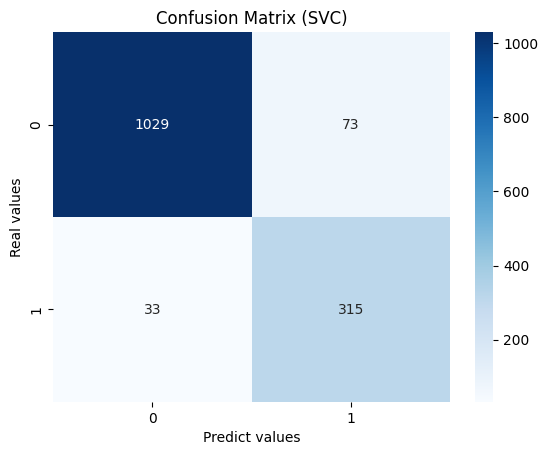

In [17]:
predictions = svc.predict(features_test)
import matplotlib.pyplot as plot
confusion = confusion_matrix(labels_test, predictions)
sns.heatmap(confusion, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (SVC)")
plot.show()

In [18]:
train_score_c4 = svc.score(features_train, labels_train)
test_score_c4 = svc.score(features_test, labels_test)


print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.92
Classical SVC on the test dataset:     0.93


In [19]:
from sklearn.metrics import classification_report
print(classification_report(labels_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1102
           1       0.81      0.91      0.86       348

    accuracy                           0.93      1450
   macro avg       0.89      0.92      0.90      1450
weighted avg       0.93      0.93      0.93      1450



In [20]:
num_obs_per_class = 100
selected_data = []

# Iterar sobre cada clase
for clase in data['class'].unique():
    # Seleccionar aleatoriamente 'num_obs_per_class' observaciones de cada clase
    selected_subset = data_pca[data_pca['class'] == clase].sample(n=num_obs_per_class, random_state=123)
    
    # Agregar el subconjunto seleccionado a la lista
    selected_data.append(selected_subset)

# Crear un nuevo DataFrame con las observaciones seleccionadas
selected_df = pd.concat(selected_data)

In [21]:
selected_df = selected_df.reset_index(drop=True)

In [22]:
labels = selected_df['class']
features = selected_df.drop(columns='class')

In [23]:
from sklearn.model_selection import train_test_split
# train_data, test_data = train_test_split(selected_df, test_size=0.2, random_state=123)
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=123)

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svc = SVC()
_ = svc.fit(features_train, labels_train) 

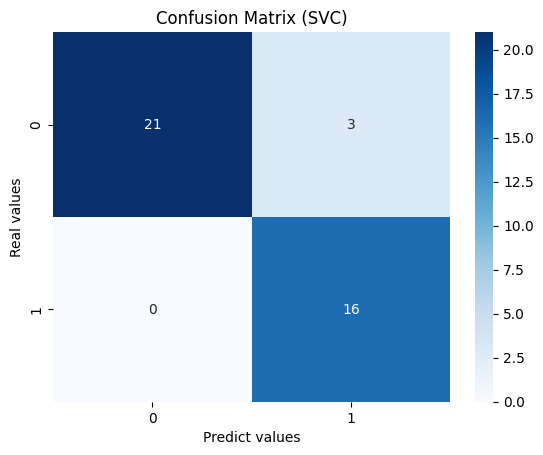

In [25]:
predictions = svc.predict(features_test)
import matplotlib.pyplot as plot
confusion = confusion_matrix(labels_test, predictions)
sns.heatmap(confusion, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (SVC)")
plot.show()

In [26]:
train_score_c4 = svc.score(features_train, labels_train)
test_score_c4 = svc.score(features_test, labels_test)


print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.89
Classical SVC on the test dataset:     0.93


c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


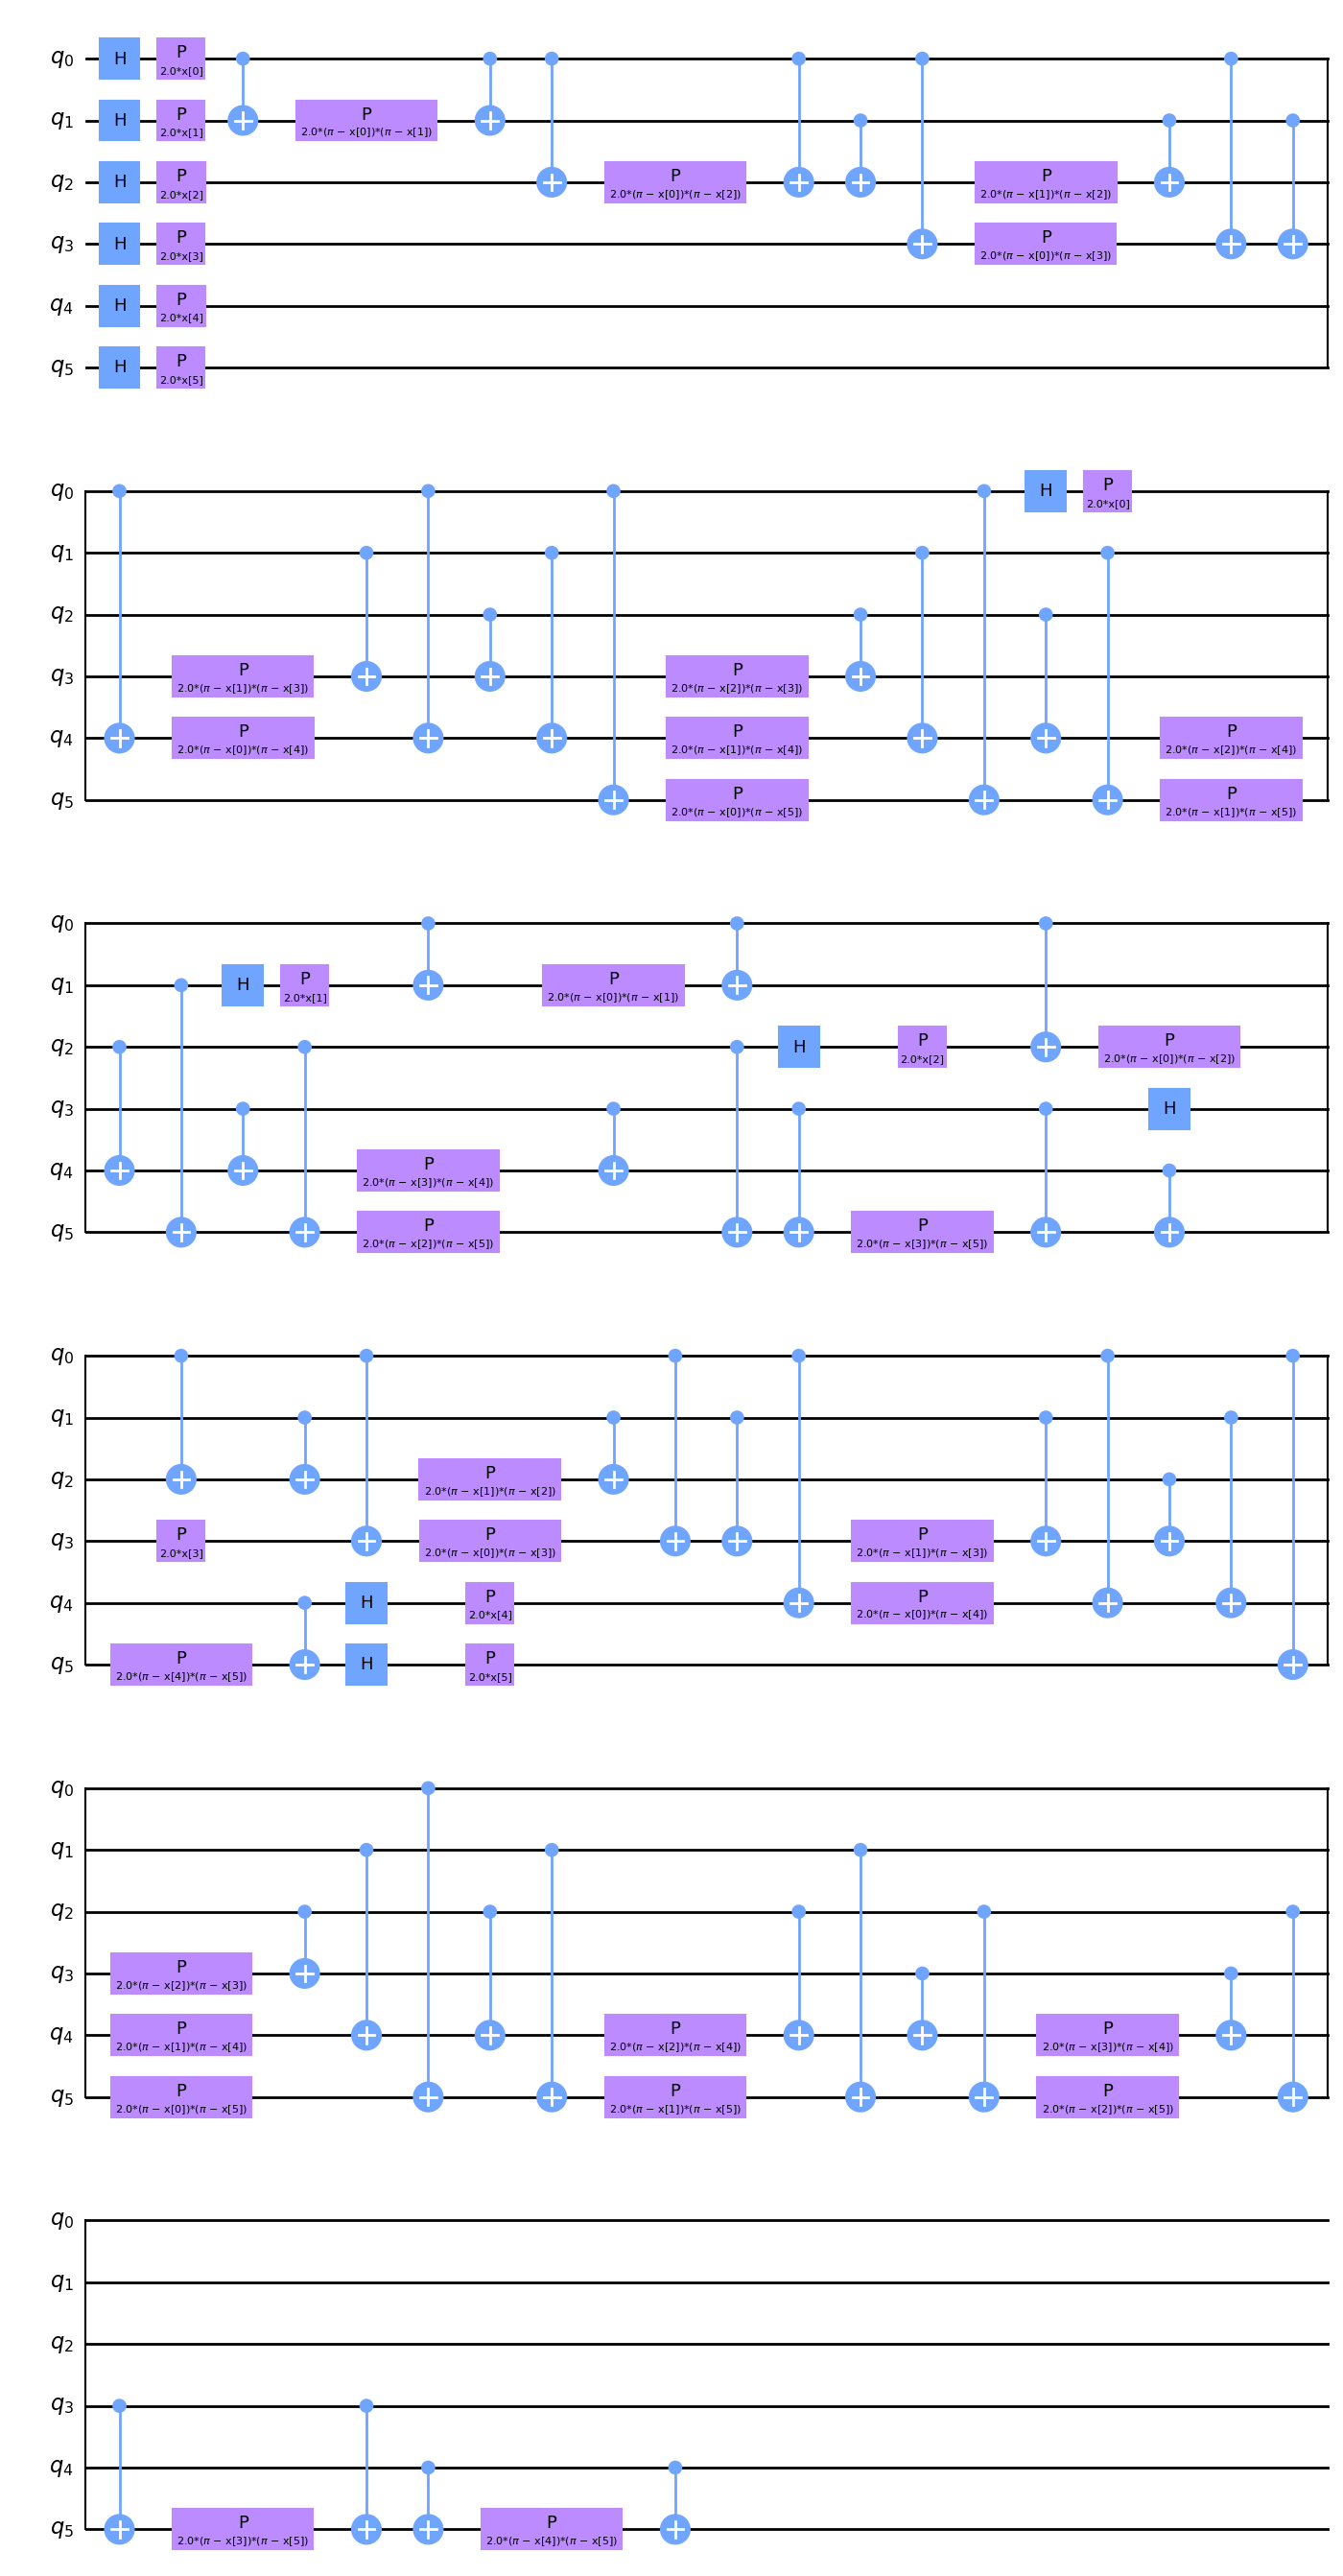

In [27]:
from qiskit.circuit.library import ZZFeatureMap
import matplotlib.pyplot as plt
num_features = features.shape[1]
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2)
feature_map.decompose().draw(output="mpl", fold=20)

## SLSQP

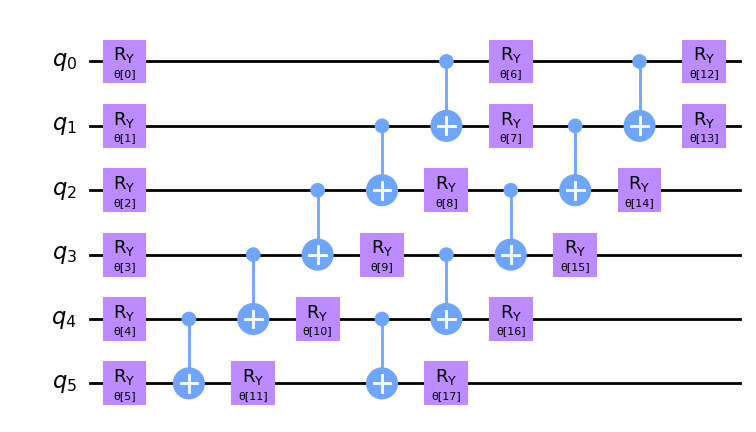

In [28]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

In [29]:
from qiskit.algorithms.optimizers import SLSQP
optimizer = SLSQP(maxiter=25)

C:\Users\estre\AppData\Local\Temp\ipykernel_23636\657383429.py:1: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed in Qiskit 1.0. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import SLSQP


In [30]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [31]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [32]:
!pip install qiskit-machine-learning

In [33]:
import numpy as np
X_train_np = np.array(features_train.values)
y_train_np = labels_train.values

In [34]:
print("Shape of X_train_np:", X_train_np.shape)
print("Shape of y_train_np:", y_train_np.shape)

Shape of X_train_np: (160, 6)
Shape of y_train_np: (160,)


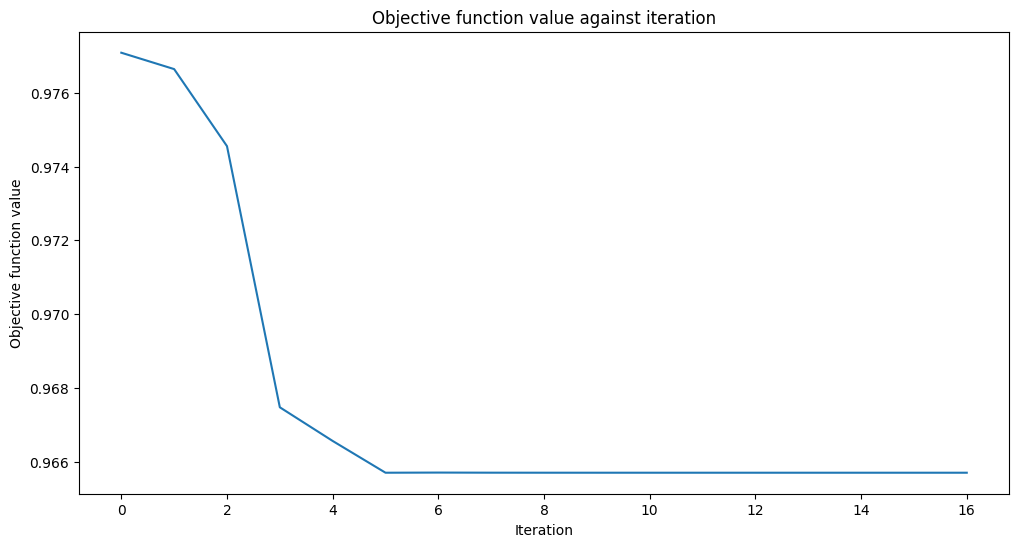

Training time: 325 seconds


In [35]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [36]:
X_test_np = np.array(features_test.values)
y_test_np = labels_test.values

In [37]:
print("Shape of X_train_np:", X_test_np.shape)
print("Shape of y_train_np:", y_test_np.shape)

Shape of X_train_np: (40, 6)
Shape of y_train_np: (40,)


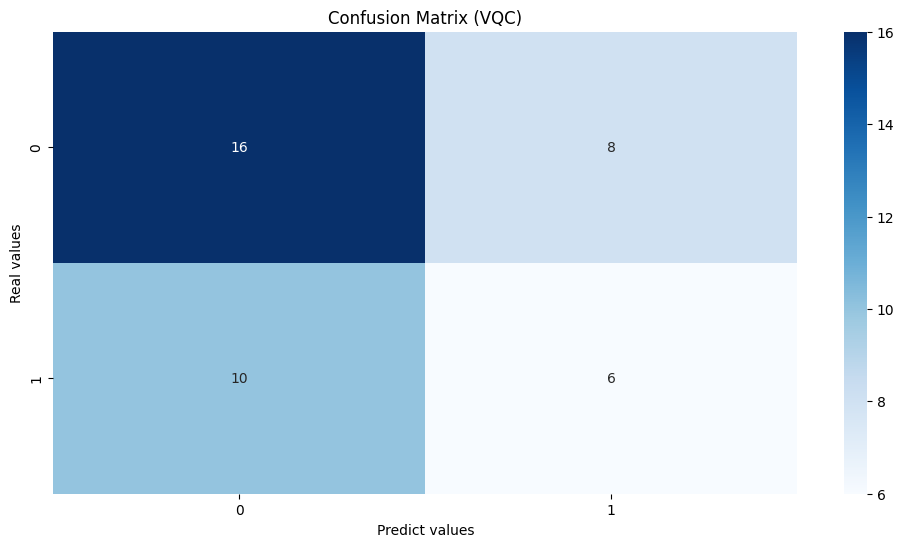

In [38]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [39]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.55
Quantum VQC on the test dataset:     0.55


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.615385  0.666667  0.640000        24
           1   0.428571  0.375000  0.400000        16

    accuracy                       0.550000        40
   macro avg   0.521978  0.520833  0.520000        40
weighted avg   0.540659  0.550000  0.544000        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


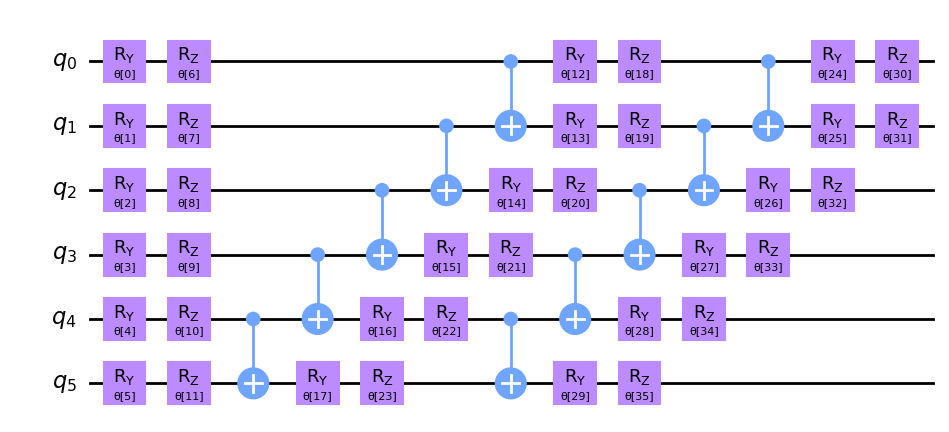

In [41]:
from qiskit.circuit.library import EfficientSU2
ansatz = EfficientSU2(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

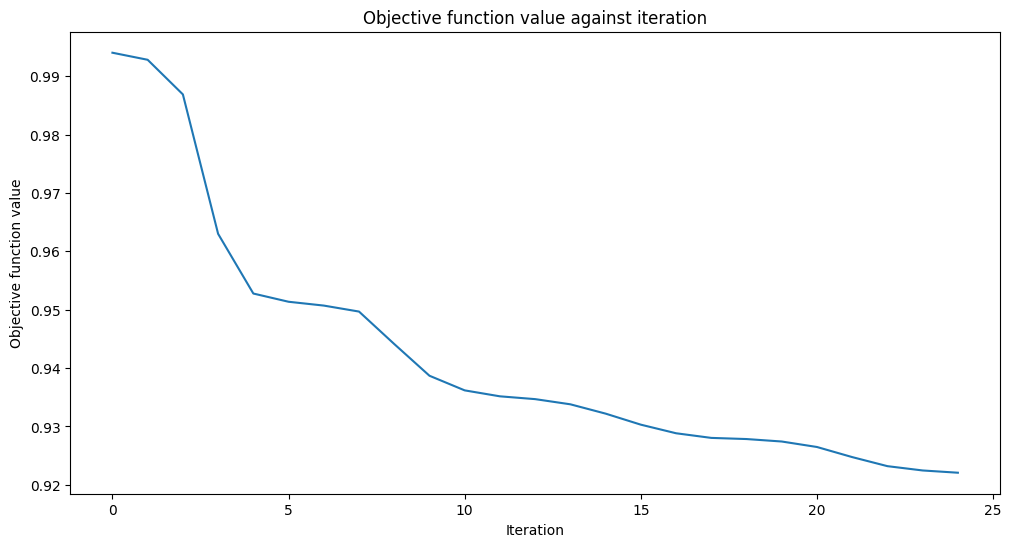

Training time: 2480 seconds


In [42]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

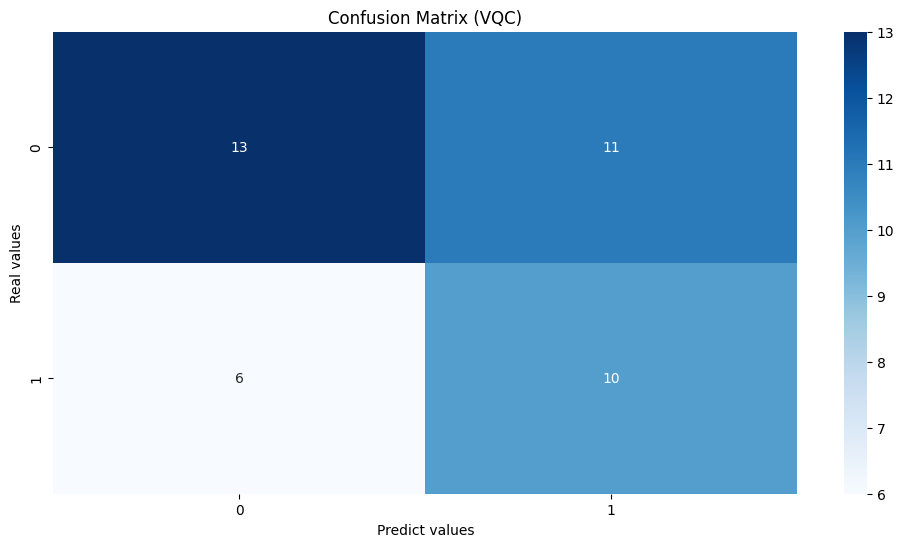

In [43]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [44]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.68
Quantum VQC on the test dataset:     0.57


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.684211  0.541667  0.604651        24
           1   0.476190  0.625000  0.540541        16

    accuracy                       0.575000        40
   macro avg   0.580201  0.583333  0.572596        40
weighted avg   0.601003  0.575000  0.579007        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


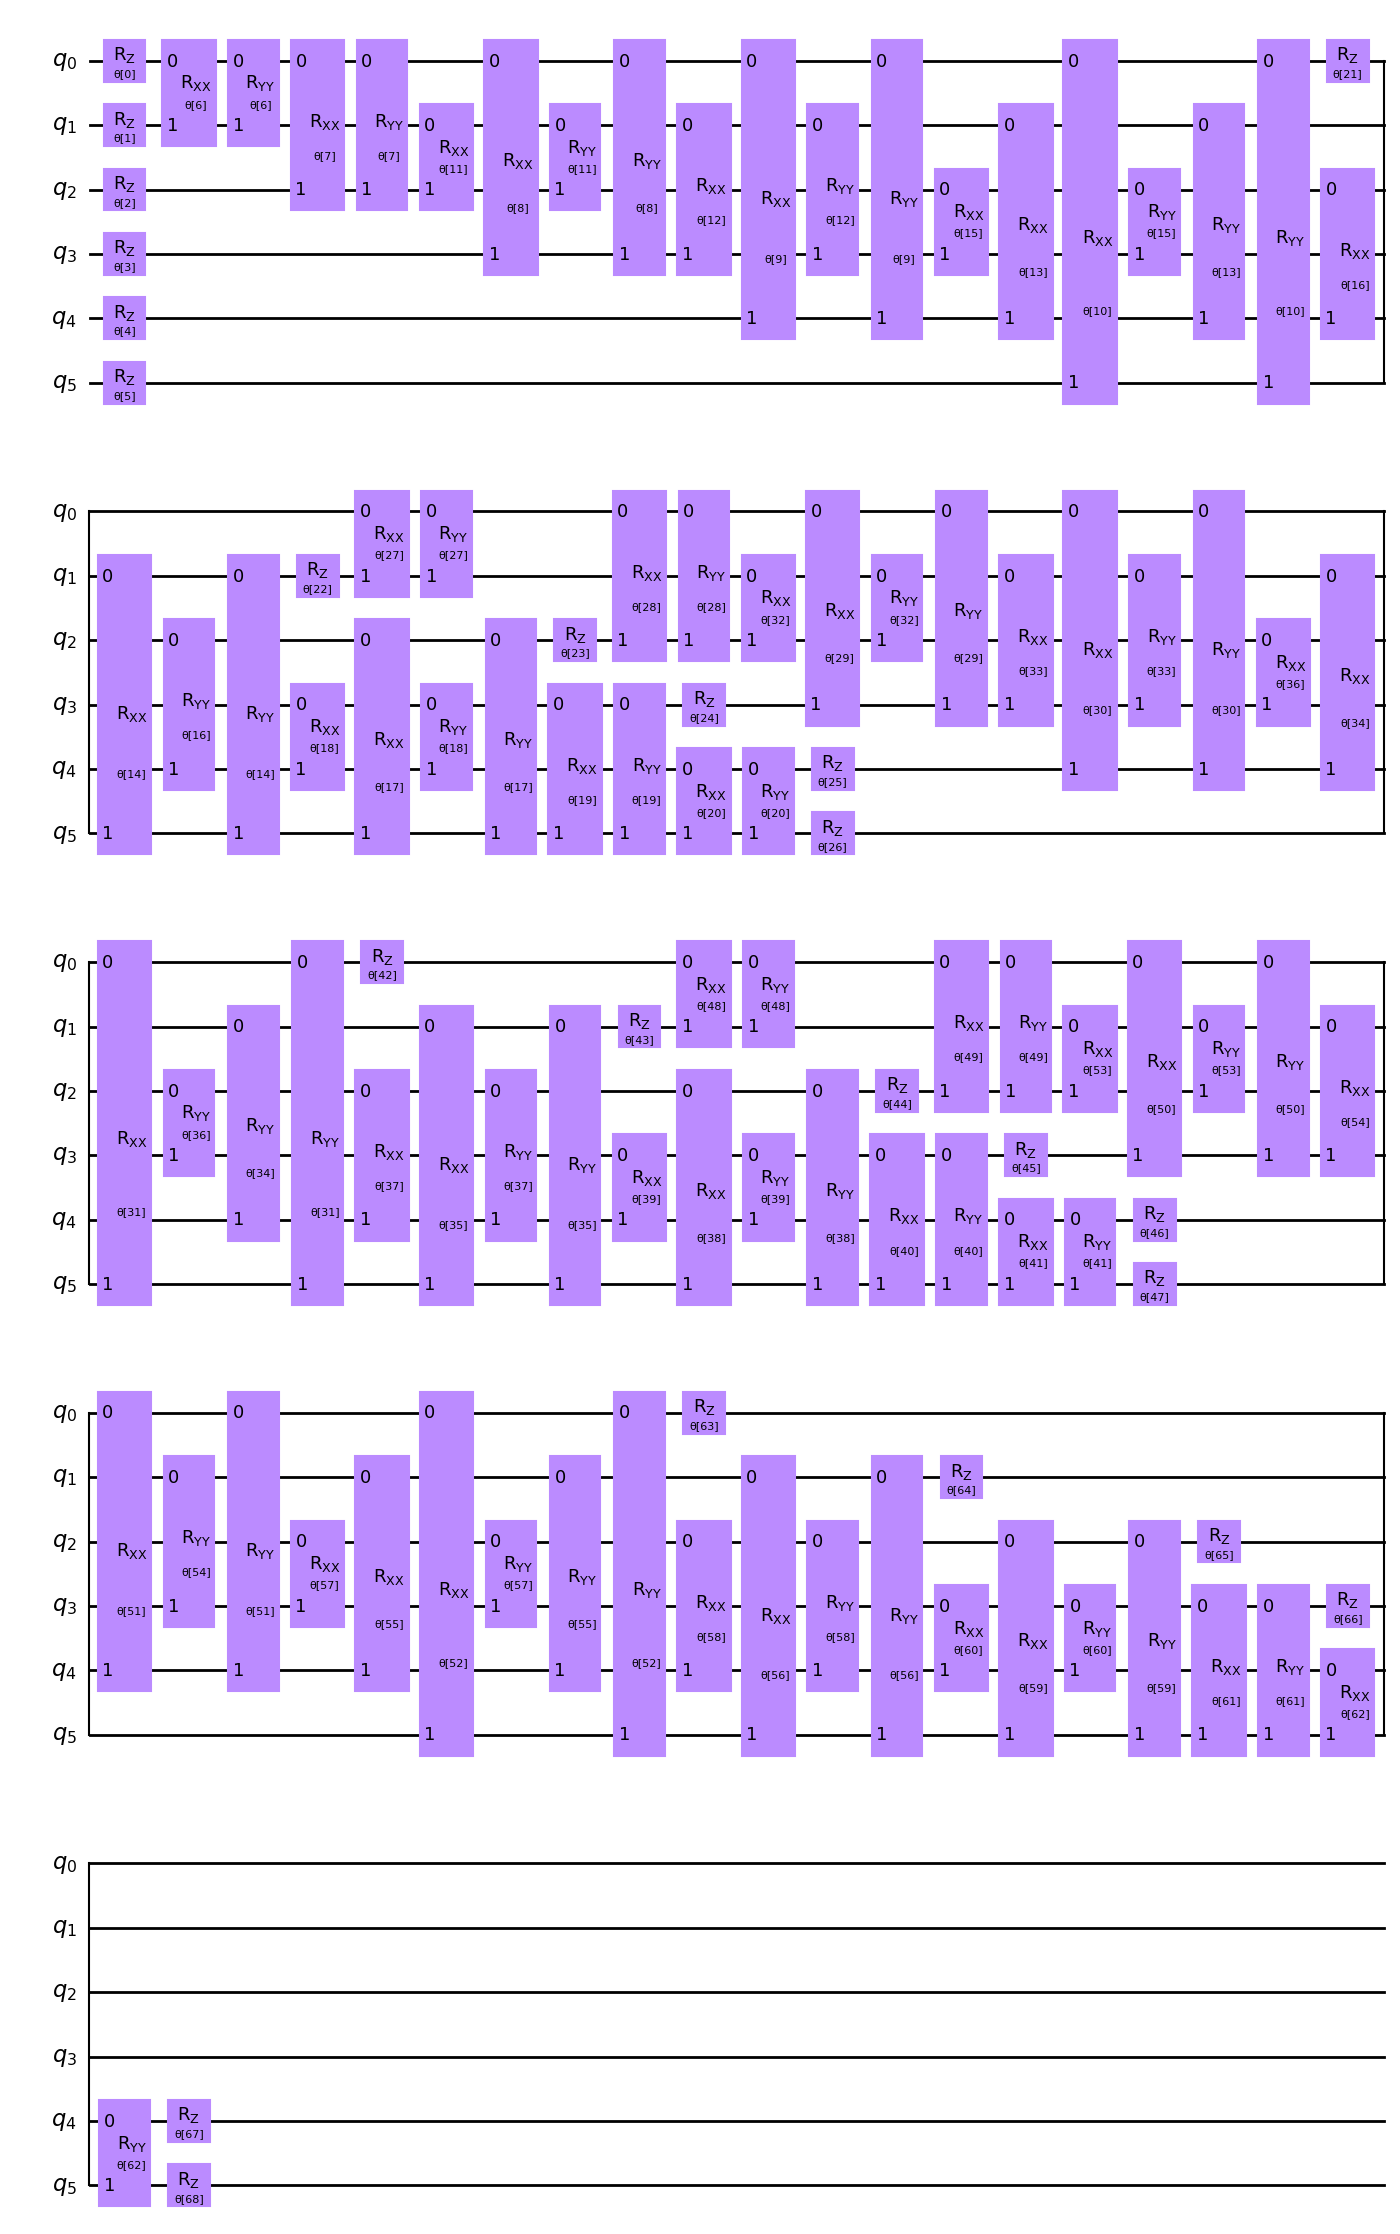

In [46]:
from qiskit.circuit.library import ExcitationPreserving
ansatz = ExcitationPreserving(num_qubits=num_features)
ansatz.decompose().draw(output="mpl", fold=20)

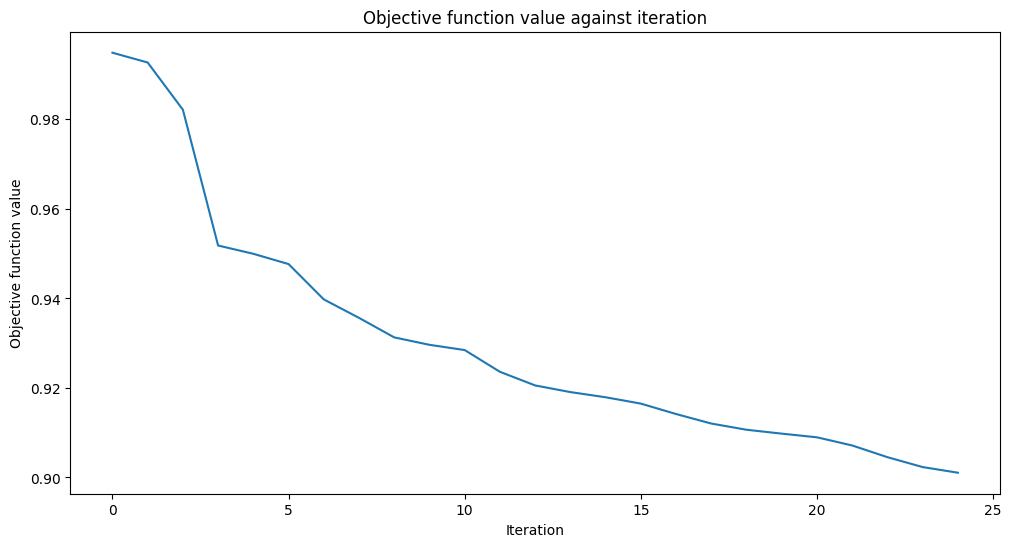

Training time: 12777 seconds


In [47]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

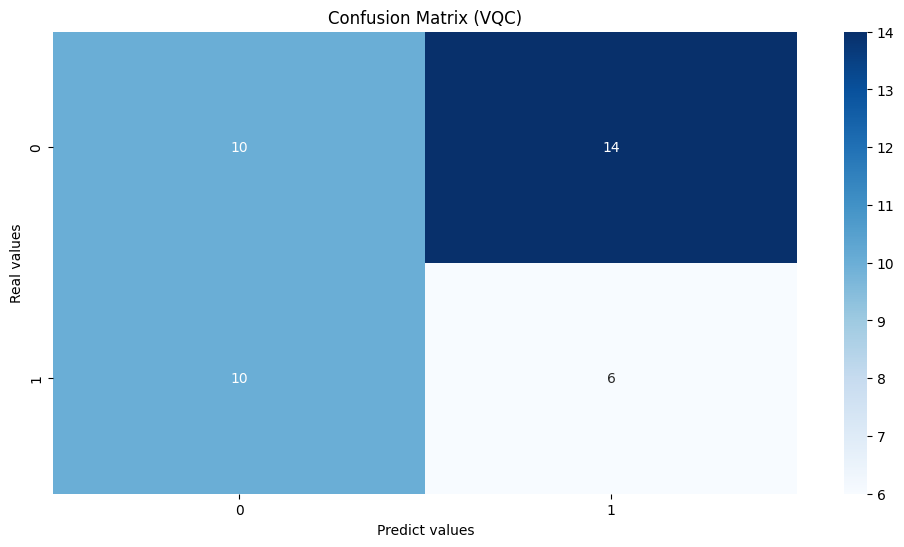

In [48]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [49]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.79
Quantum VQC on the test dataset:     0.40


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.500000  0.416667  0.454545        24
           1   0.300000  0.375000  0.333333        16

    accuracy                       0.400000        40
   macro avg   0.400000  0.395833  0.393939        40
weighted avg   0.420000  0.400000  0.406061        40



## COBYLA

In [51]:
from qiskit.algorithms.optimizers import COBYLA
optimizer = COBYLA(maxiter=100)

c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


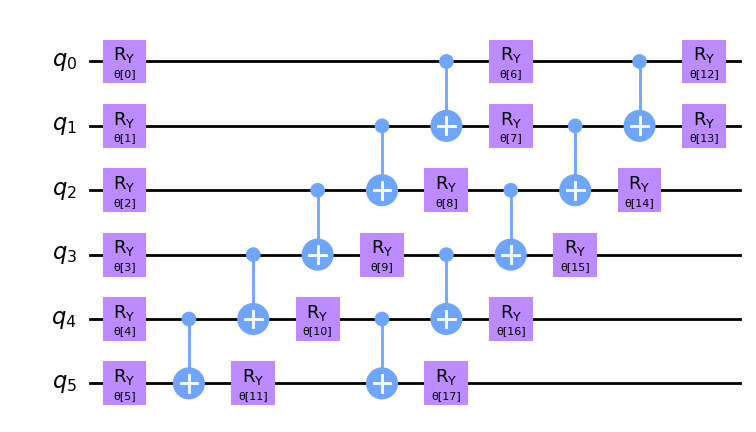

In [52]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

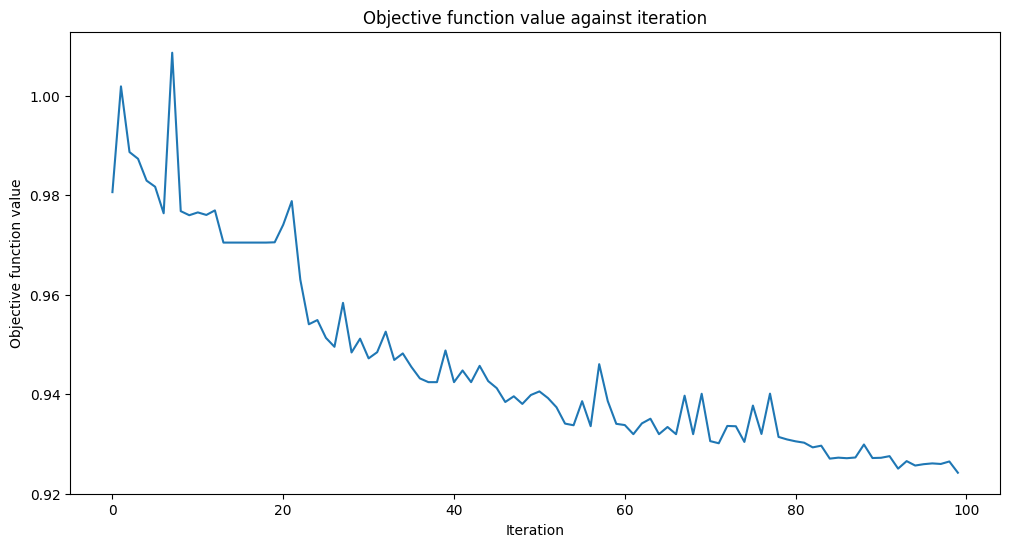

Training time: 536 seconds


In [53]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

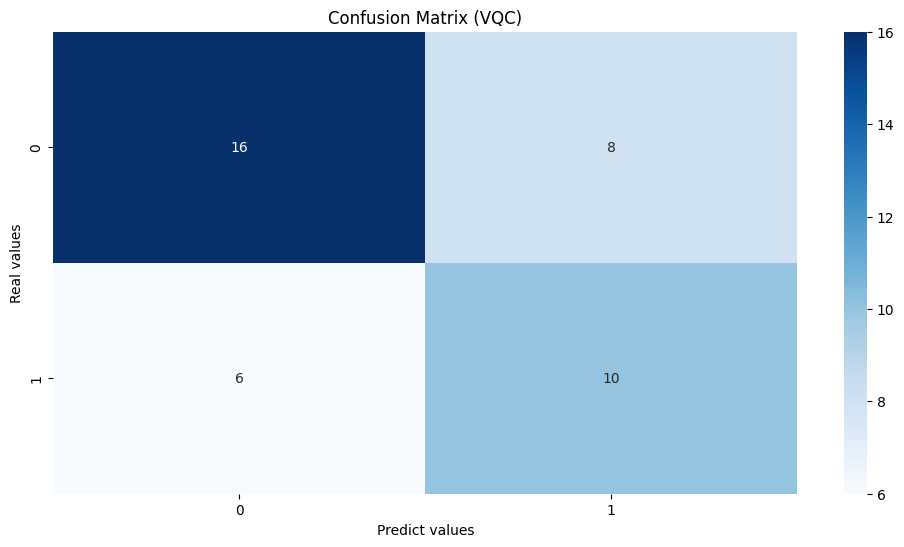

In [54]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [55]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.65
Quantum VQC on the test dataset:     0.65


In [56]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.727273  0.666667  0.695652        24
           1   0.555556  0.625000  0.588235        16

    accuracy                       0.650000        40
   macro avg   0.641414  0.645833  0.641944        40
weighted avg   0.658586  0.650000  0.652685        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


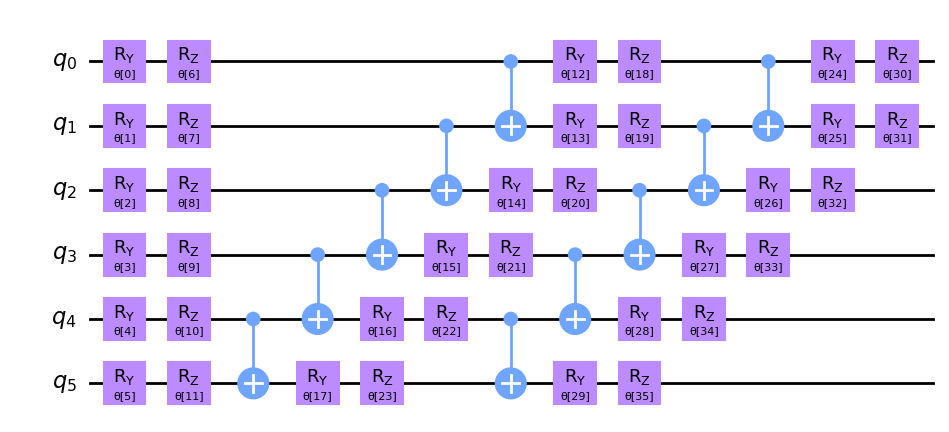

In [57]:
from qiskit.circuit.library import EfficientSU2
ansatz = EfficientSU2(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

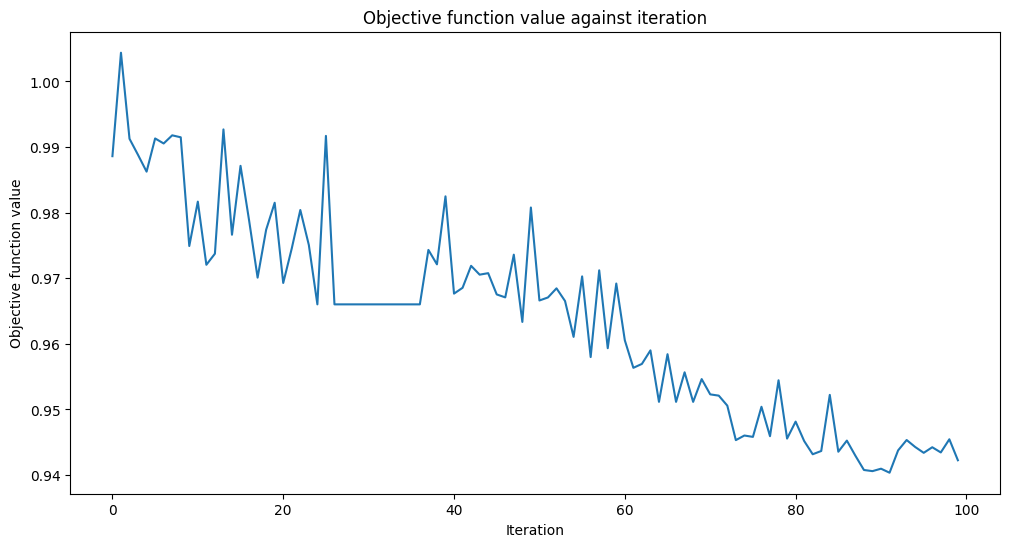

Training time: 580 seconds


In [58]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

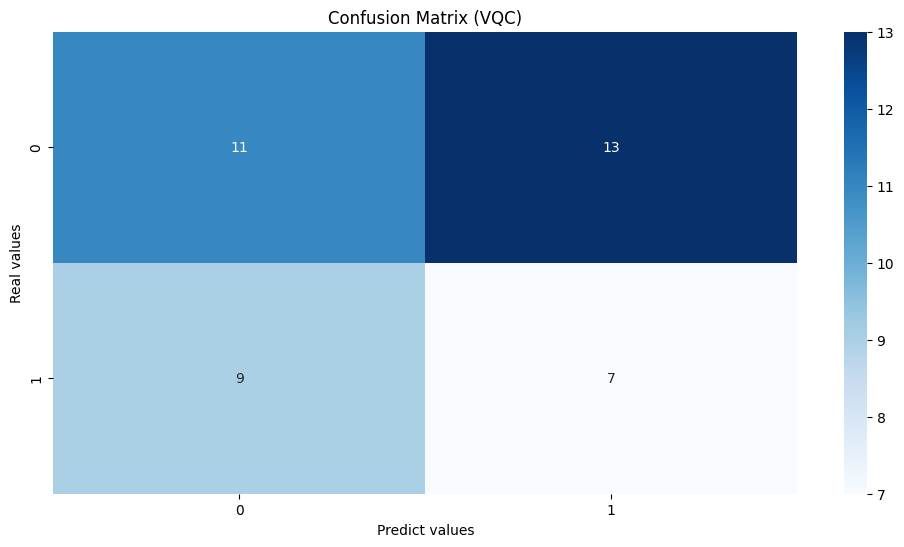

In [59]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [60]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.68
Quantum VQC on the test dataset:     0.45


In [61]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.550000  0.458333  0.500000        24
           1   0.350000  0.437500  0.388889        16

    accuracy                       0.450000        40
   macro avg   0.450000  0.447917  0.444444        40
weighted avg   0.470000  0.450000  0.455556        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


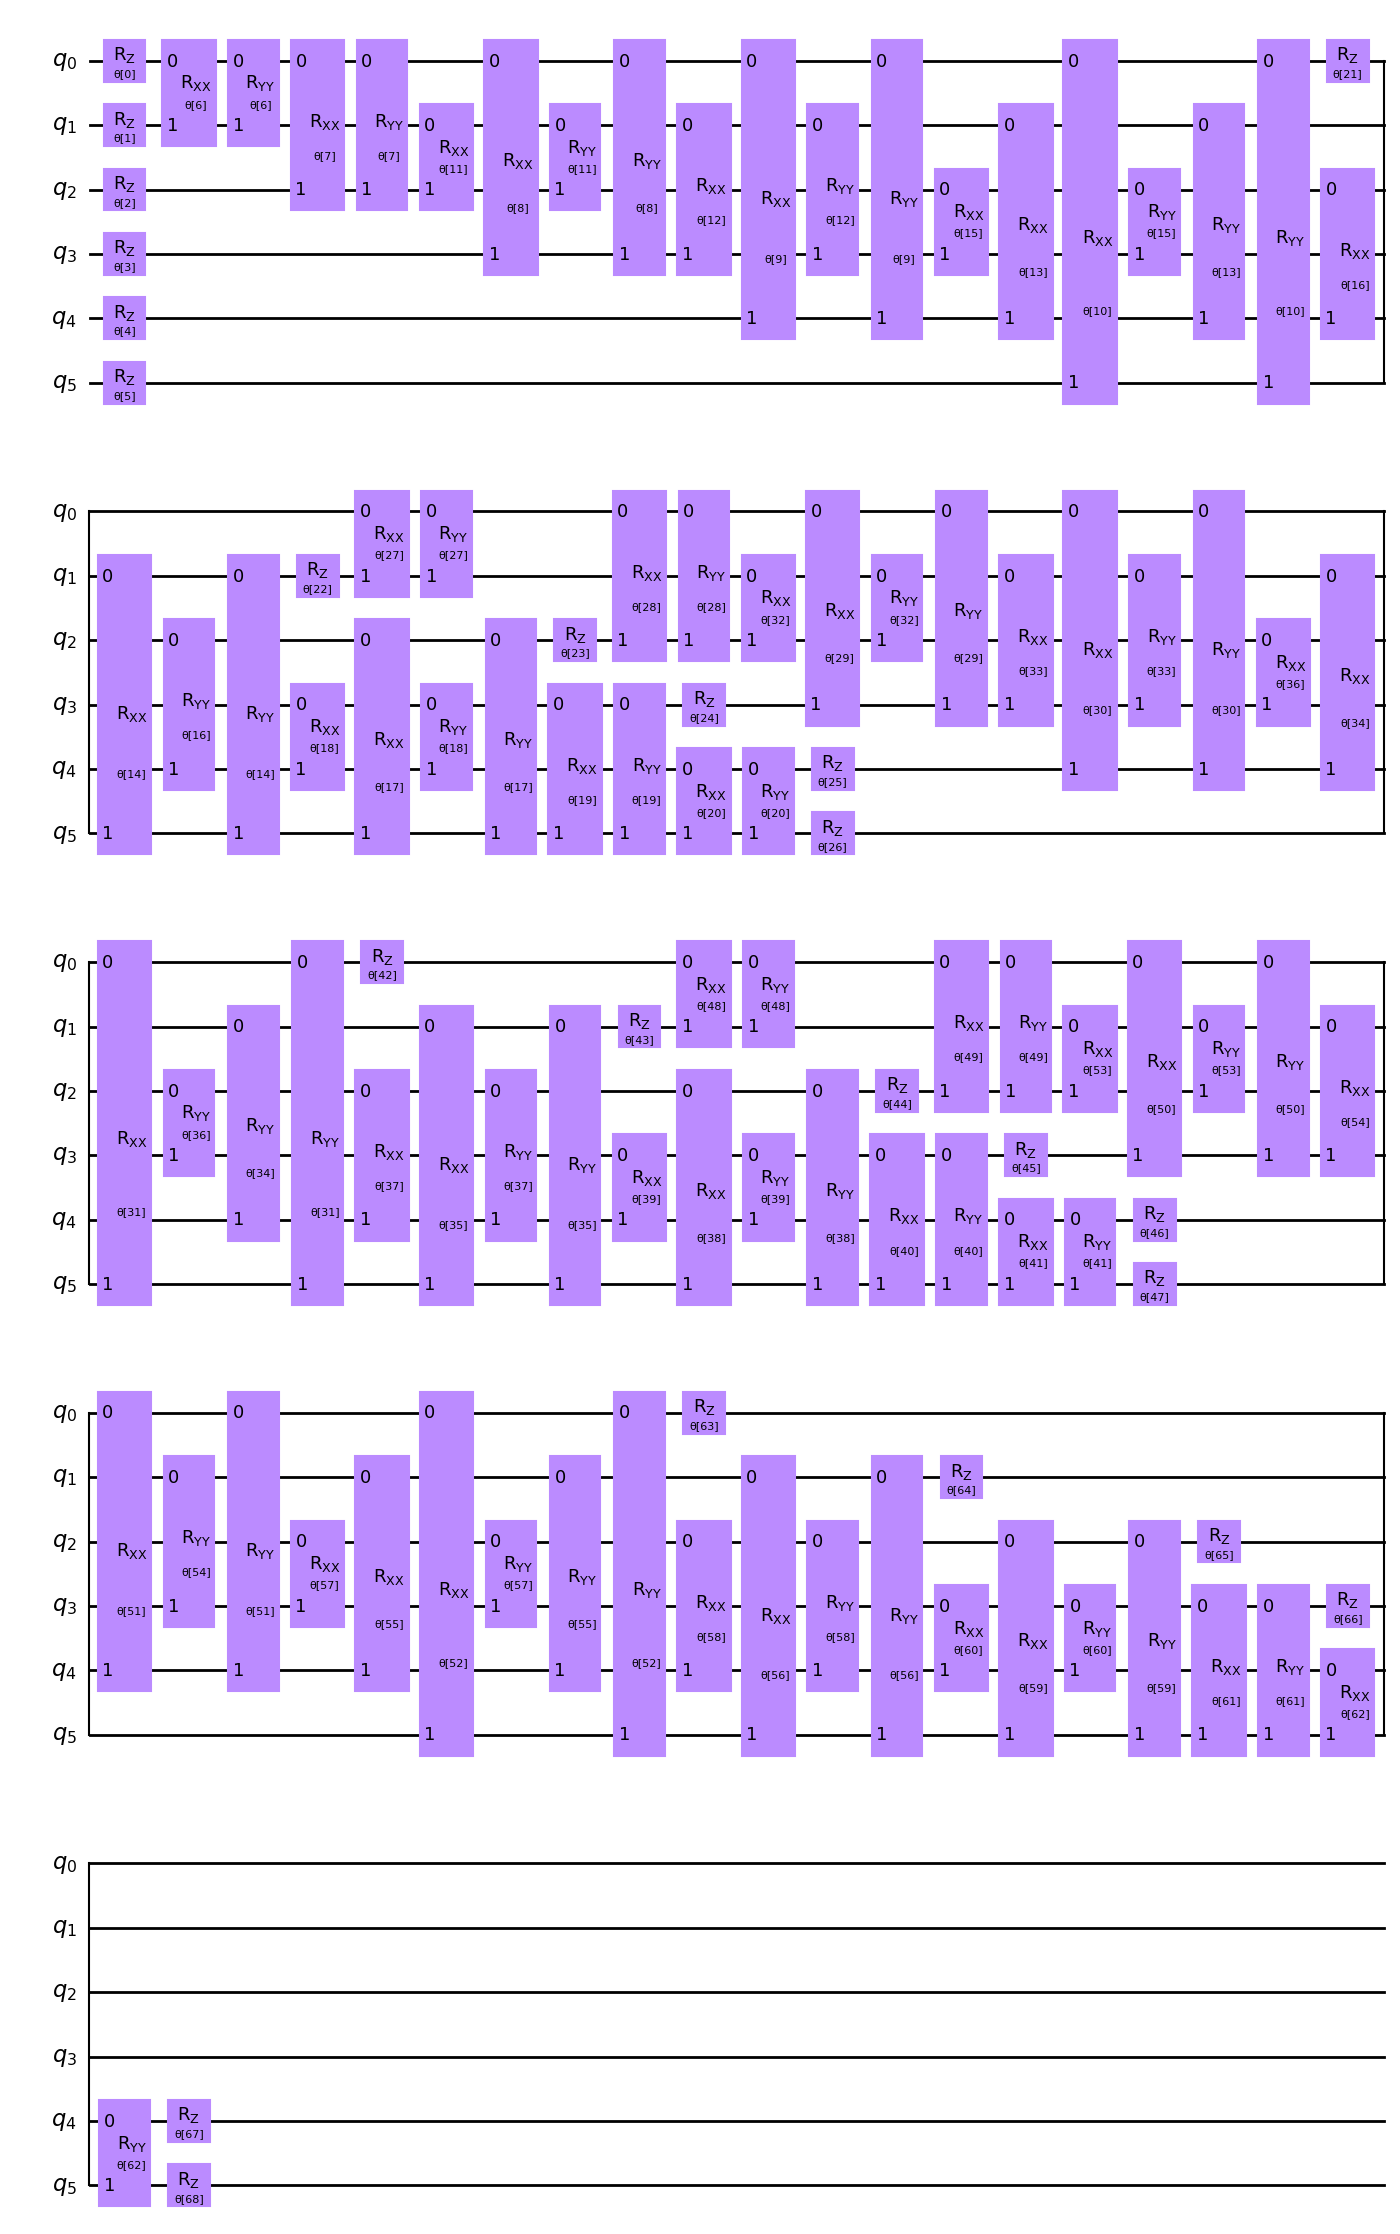

In [62]:
from qiskit.circuit.library import ExcitationPreserving
ansatz = ExcitationPreserving(num_qubits=num_features)
ansatz.decompose().draw(output="mpl", fold=20)

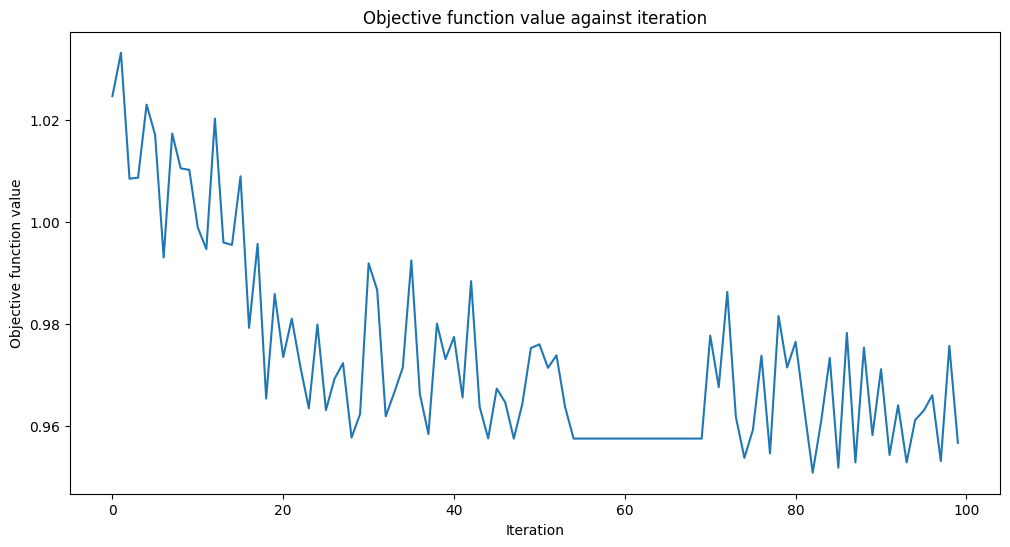

Training time: 716 seconds


In [63]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

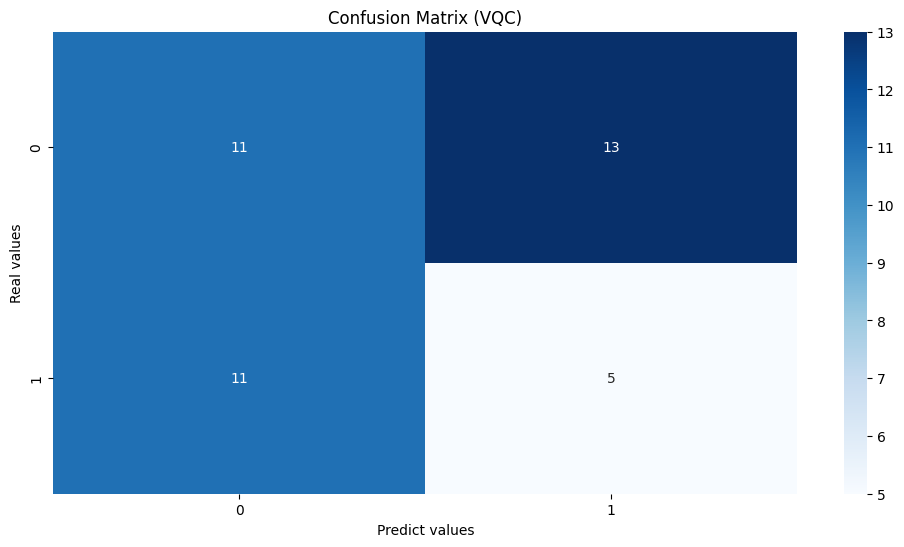

In [64]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [65]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.67
Quantum VQC on the test dataset:     0.40


In [66]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.500000  0.458333  0.478261        24
           1   0.277778  0.312500  0.294118        16

    accuracy                       0.400000        40
   macro avg   0.388889  0.385417  0.386189        40
weighted avg   0.411111  0.400000  0.404604        40



## Gradiant Descents

In [67]:
from qiskit.algorithms.optimizers import GradientDescent
optimizer = GradientDescent(maxiter=25)

c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


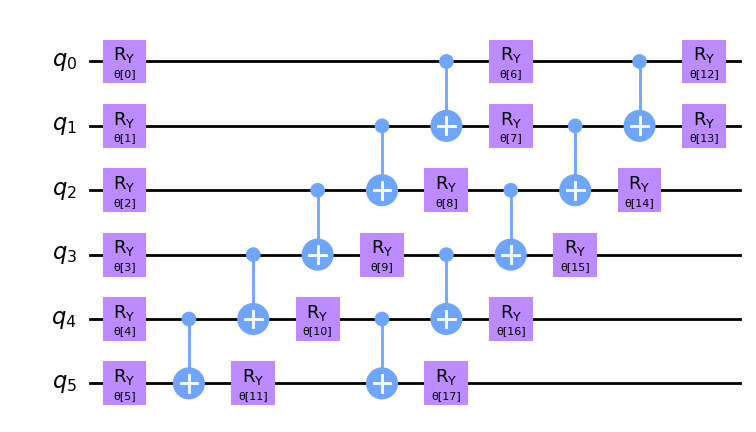

In [68]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

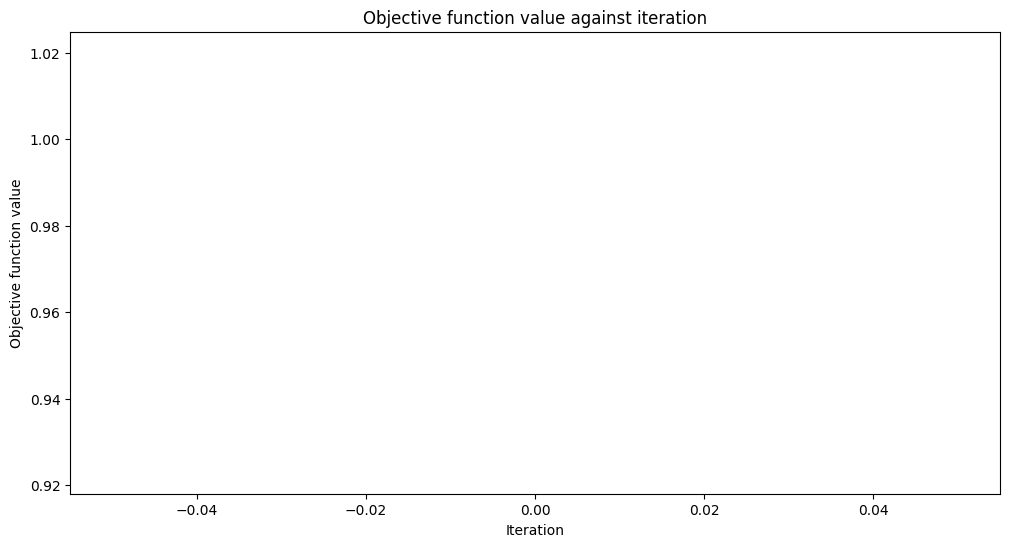

Training time: 1131 seconds


In [69]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

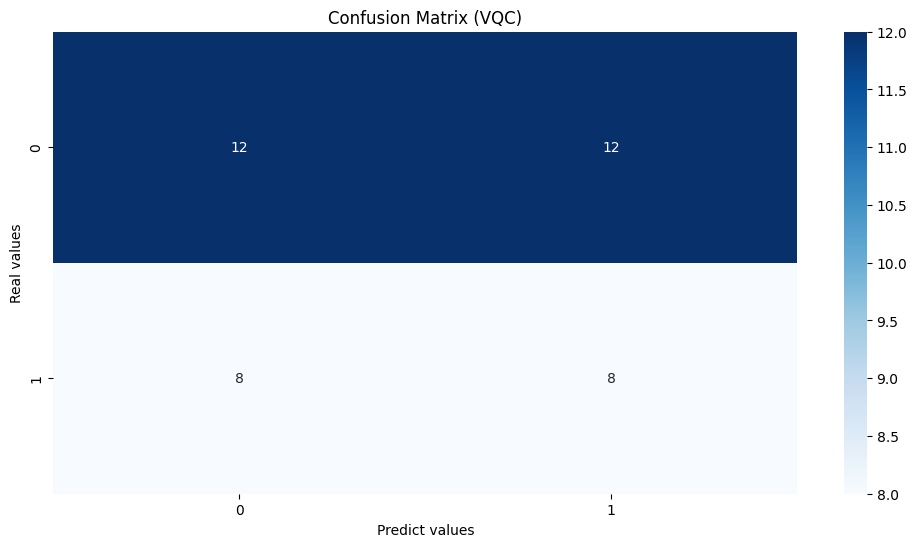

In [70]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [71]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.57
Quantum VQC on the test dataset:     0.50


In [72]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.600000  0.500000  0.545455        24
           1   0.400000  0.500000  0.444444        16

    accuracy                       0.500000        40
   macro avg   0.500000  0.500000  0.494949        40
weighted avg   0.520000  0.500000  0.505051        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


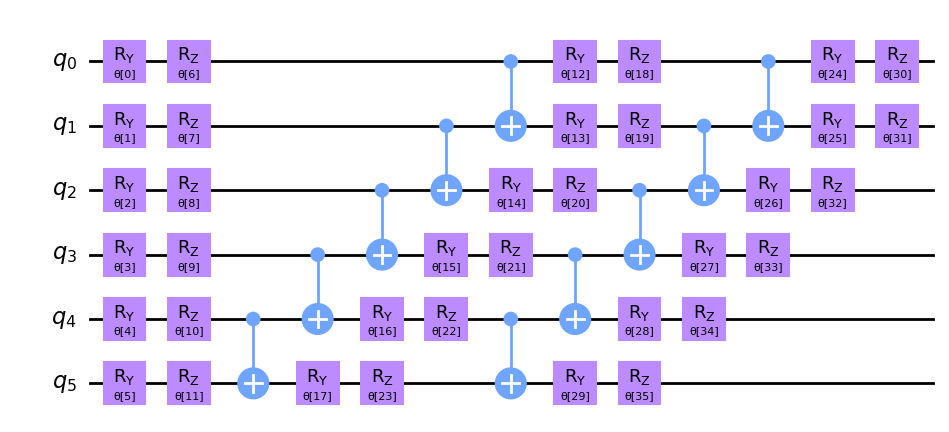

In [73]:
from qiskit.circuit.library import EfficientSU2
ansatz = EfficientSU2(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

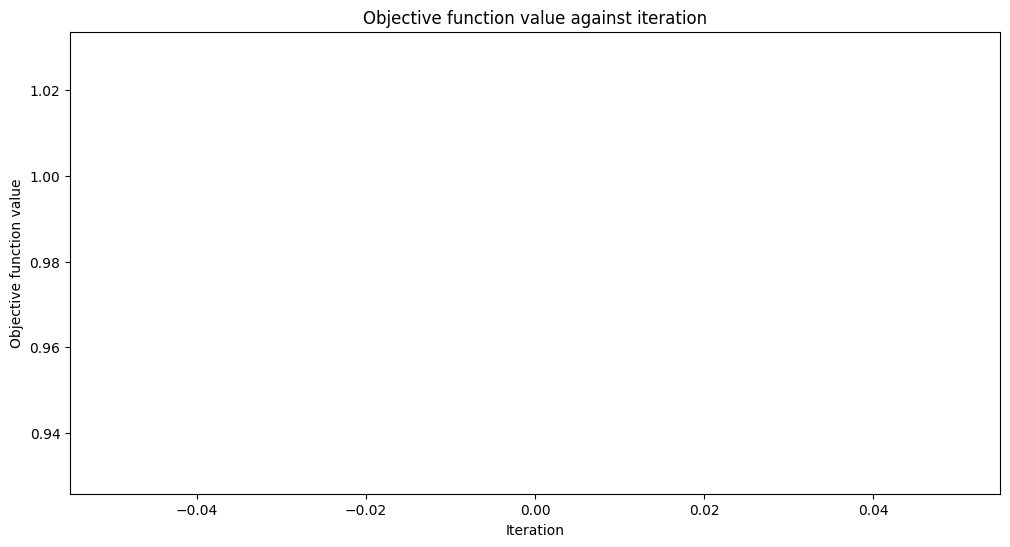

Training time: 2462 seconds


In [74]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

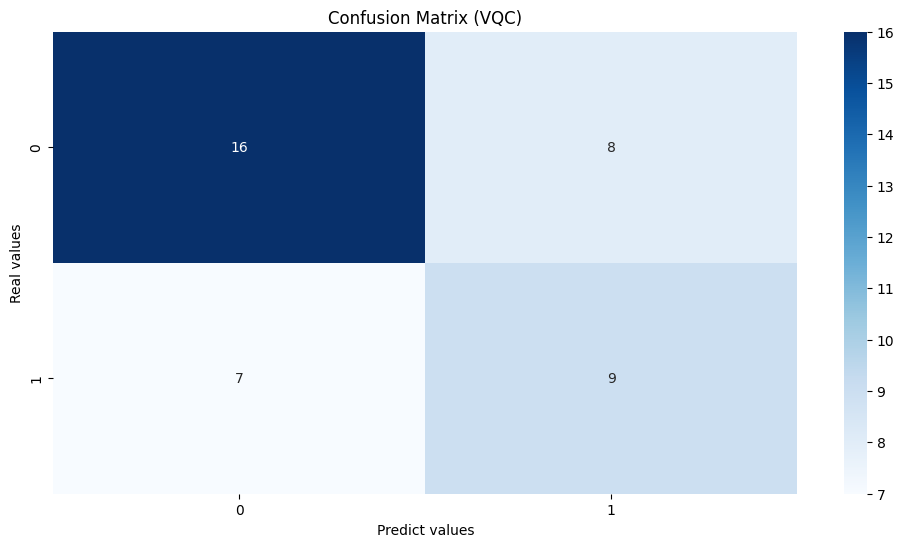

In [75]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [76]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.54
Quantum VQC on the test dataset:     0.62


In [77]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.695652  0.666667  0.680851        24
           1   0.529412  0.562500  0.545455        16

    accuracy                       0.625000        40
   macro avg   0.612532  0.614583  0.613153        40
weighted avg   0.629156  0.625000  0.626692        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


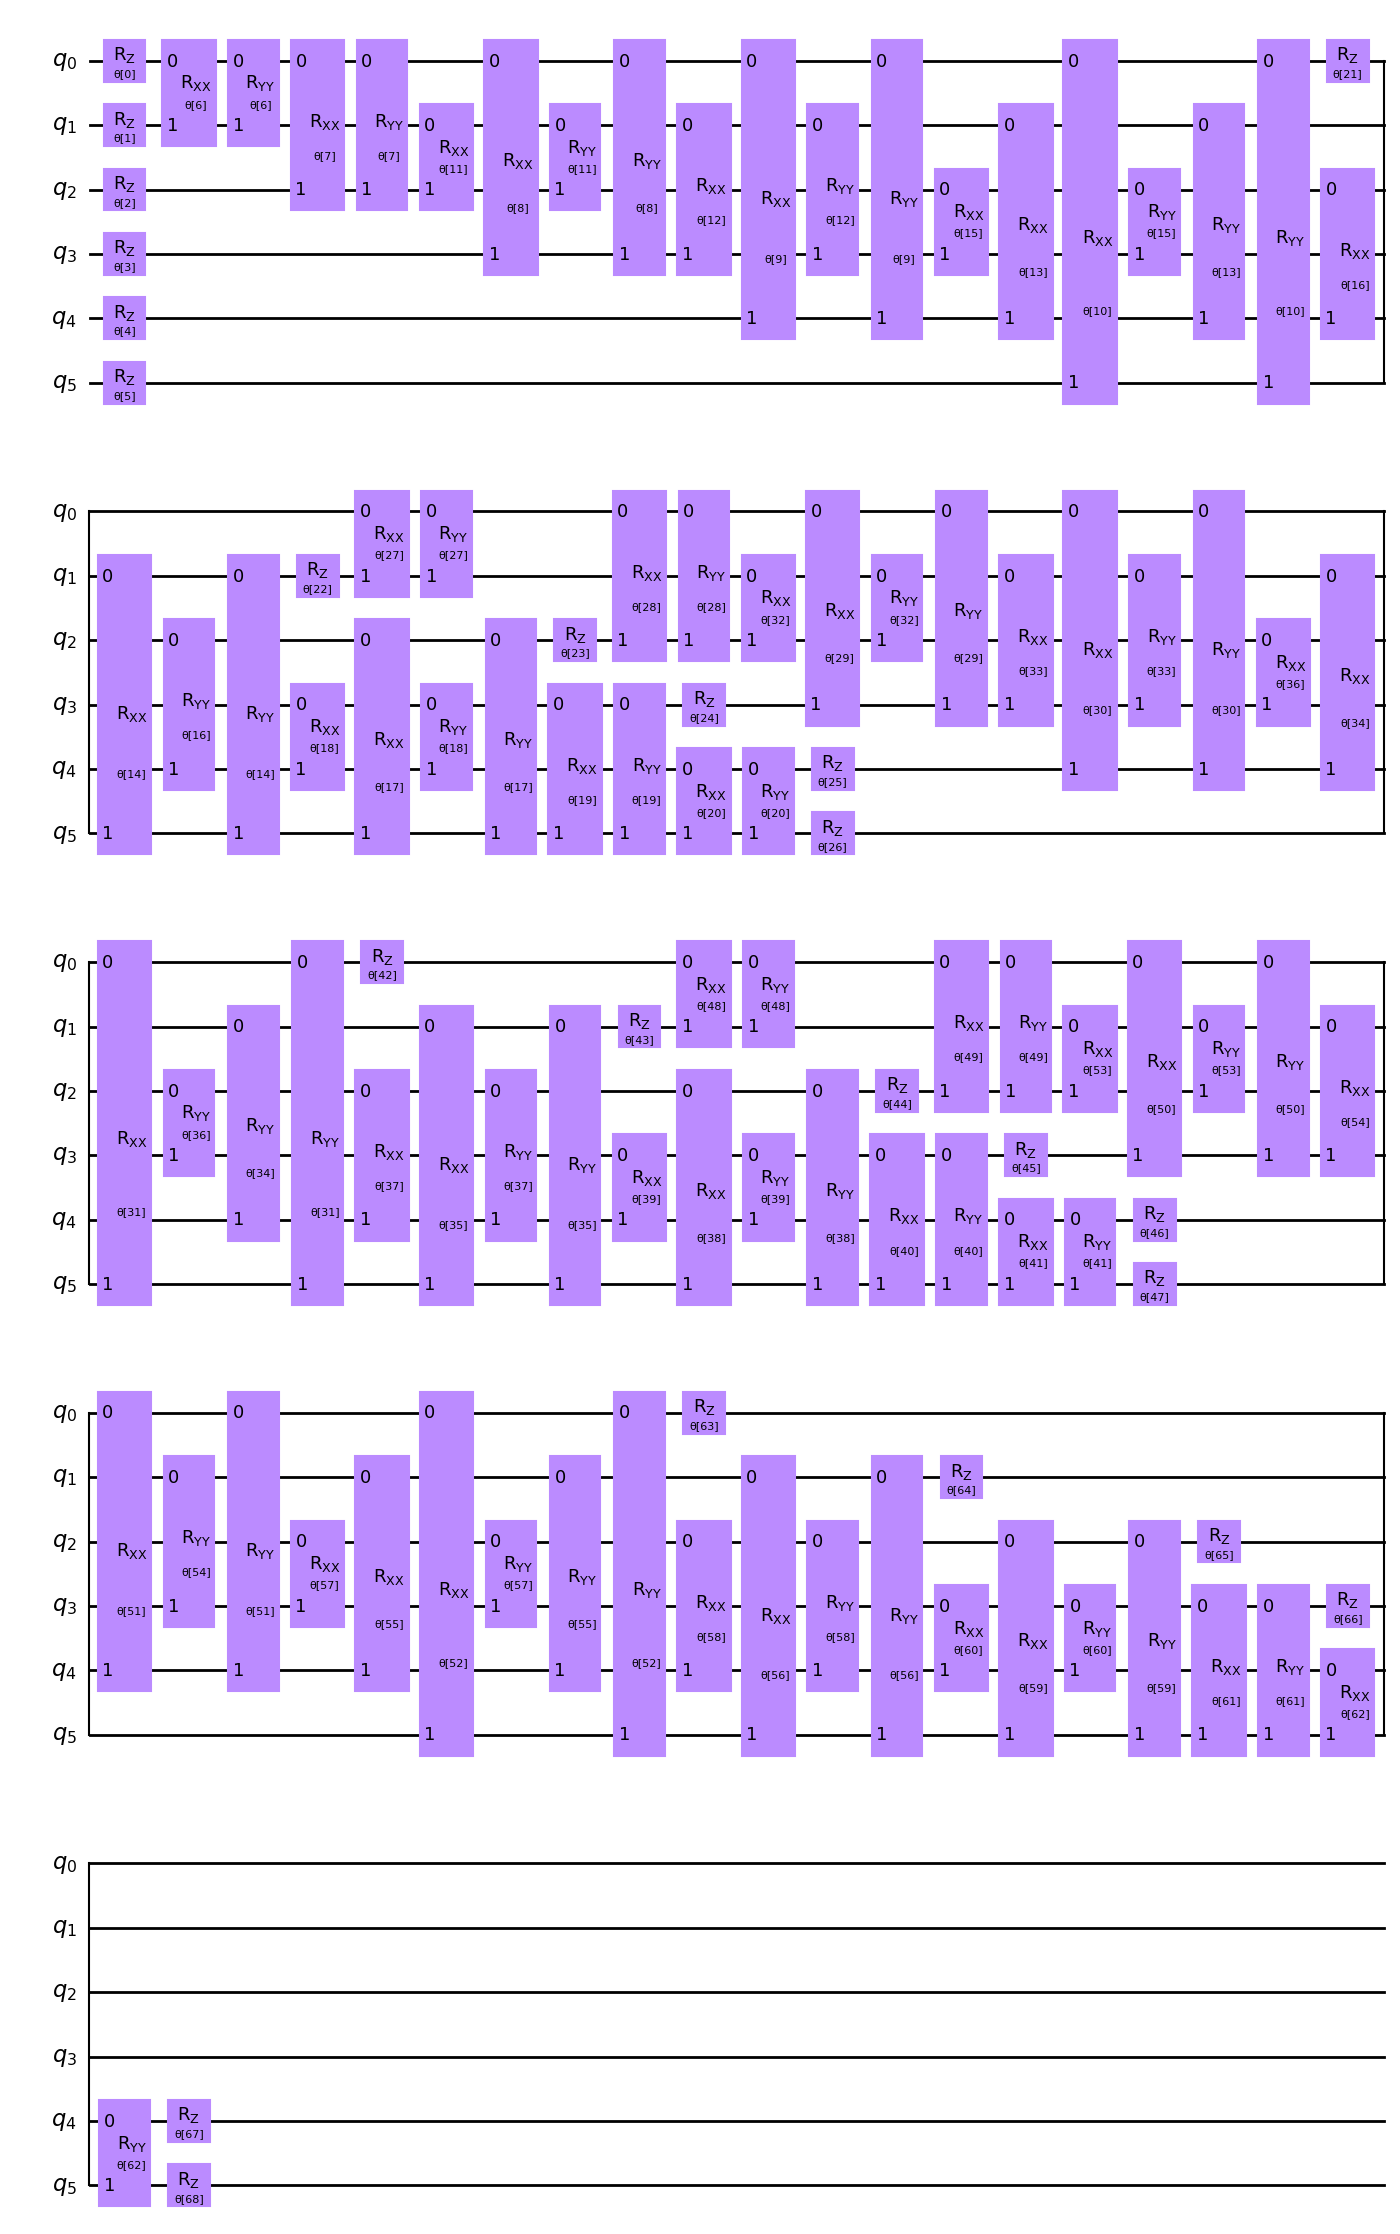

In [78]:
from qiskit.circuit.library import ExcitationPreserving
ansatz = ExcitationPreserving(num_qubits=num_features)
ansatz.decompose().draw(output="mpl", fold=20)

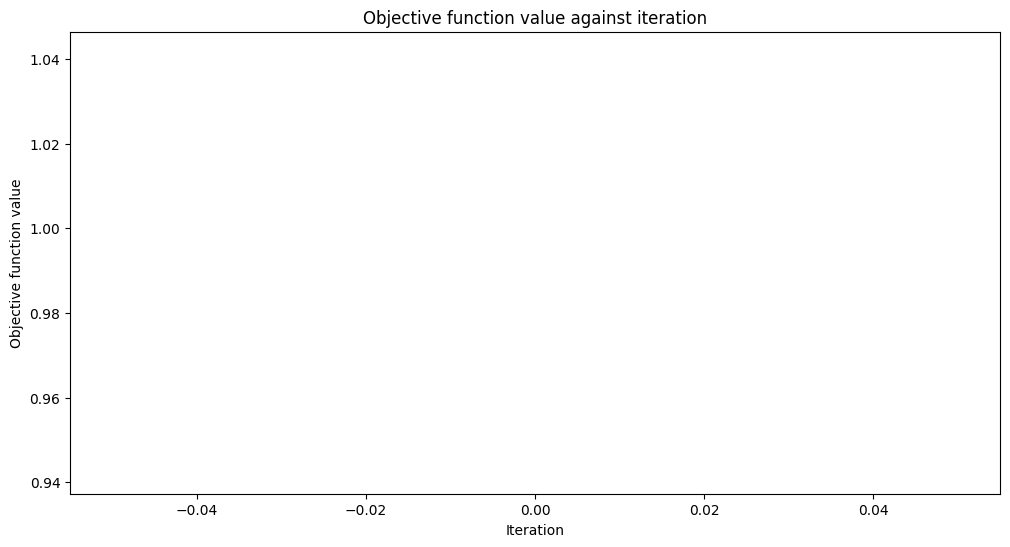

Training time: 15882 seconds


In [79]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

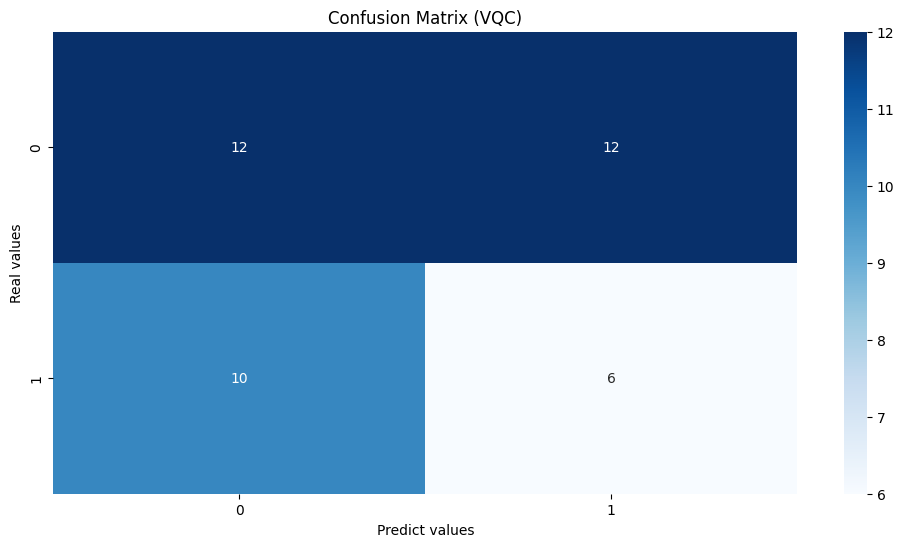

In [80]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [81]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.53
Quantum VQC on the test dataset:     0.45


In [82]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.545455  0.500000  0.521739        24
           1   0.333333  0.375000  0.352941        16

    accuracy                       0.450000        40
   macro avg   0.439394  0.437500  0.437340        40
weighted avg   0.460606  0.450000  0.454220        40



## SPSA

In [83]:
from qiskit.algorithms.optimizers import SPSA
optimizer = SPSA(maxiter=100)

c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


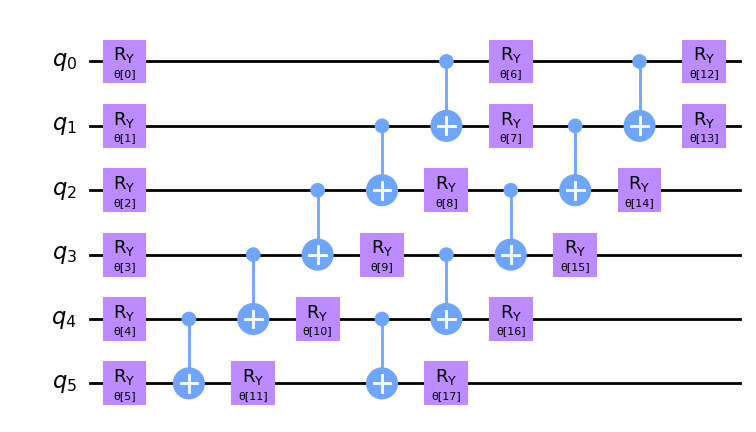

In [84]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

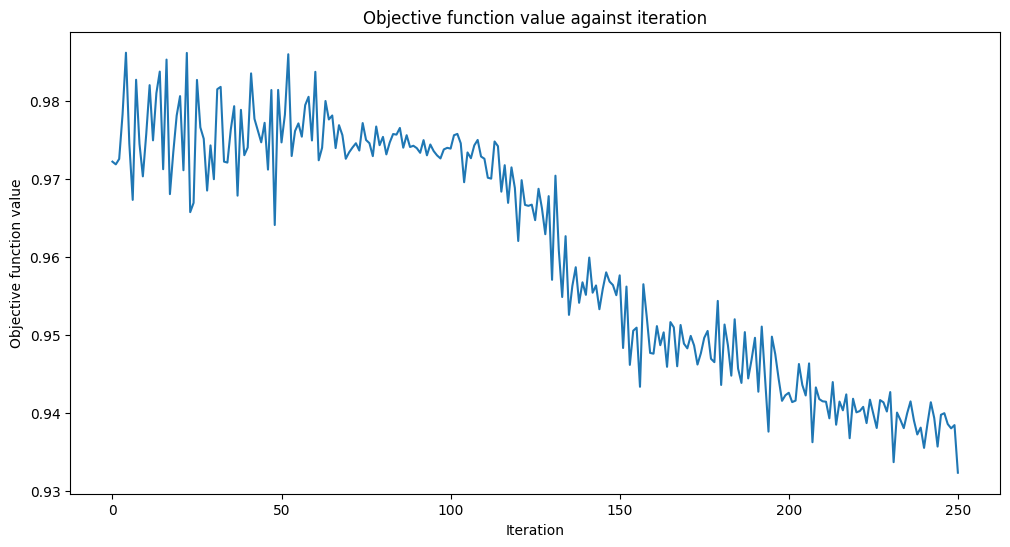

Training time: 1451 seconds


In [85]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

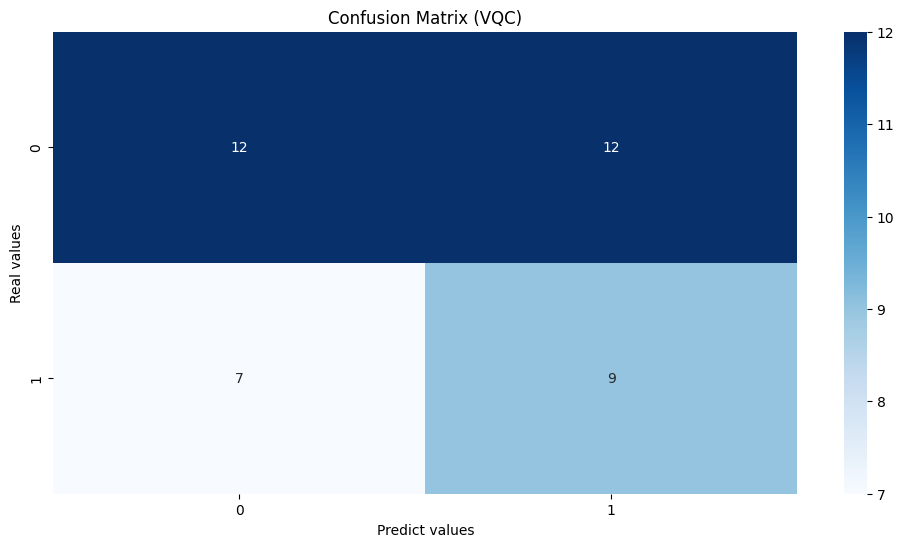

In [86]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [87]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.63
Quantum VQC on the test dataset:     0.53


In [88]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.631579  0.500000  0.558140        24
           1   0.428571  0.562500  0.486486        16

    accuracy                       0.525000        40
   macro avg   0.530075  0.531250  0.522313        40
weighted avg   0.550376  0.525000  0.529478        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


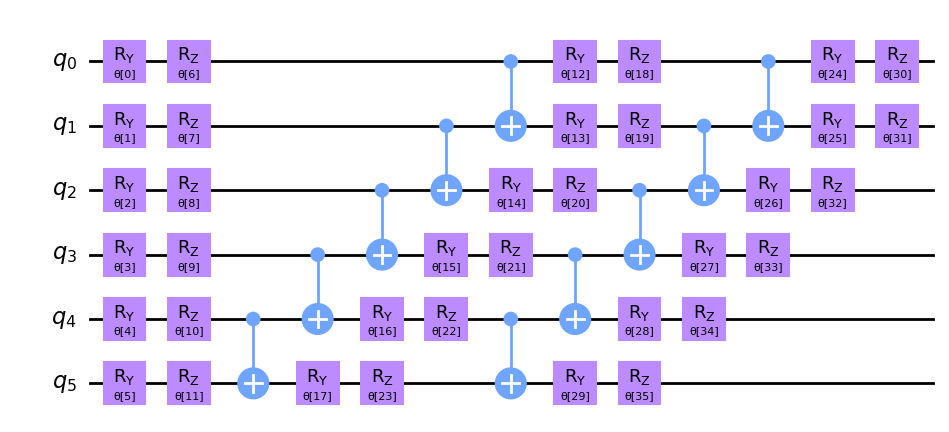

In [89]:
from qiskit.circuit.library import EfficientSU2
ansatz = EfficientSU2(num_qubits=num_features, reps=2)
ansatz.decompose().draw(output="mpl", fold=20)

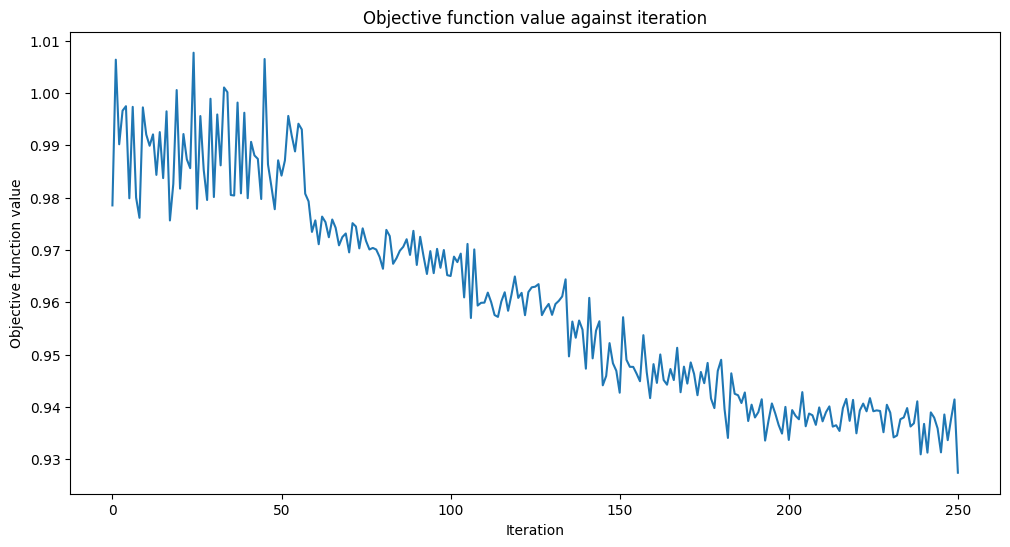

Training time: 1544 seconds


In [90]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

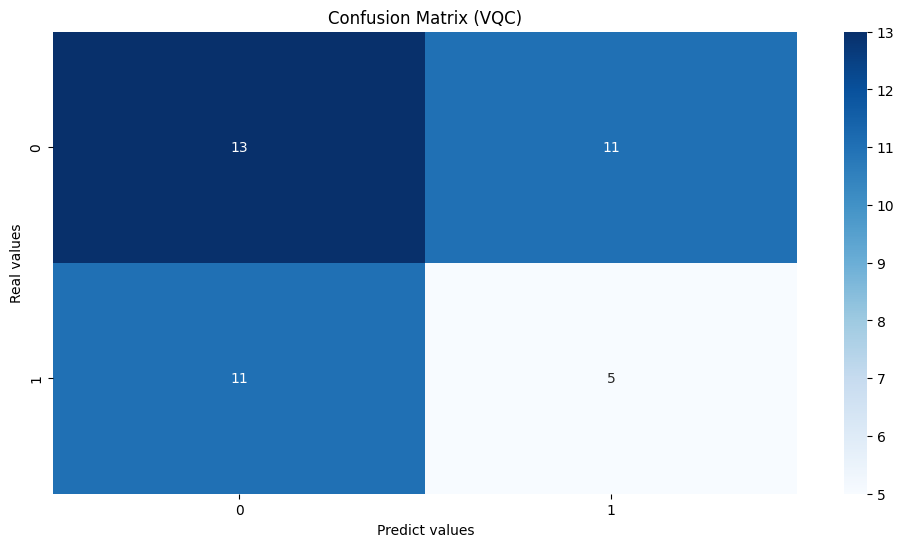

In [91]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [92]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.66
Quantum VQC on the test dataset:     0.45


In [93]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.541667  0.541667  0.541667        24
           1   0.312500  0.312500  0.312500        16

    accuracy                       0.450000        40
   macro avg   0.427083  0.427083  0.427083        40
weighted avg   0.450000  0.450000  0.450000        40



c:\Users\estre\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


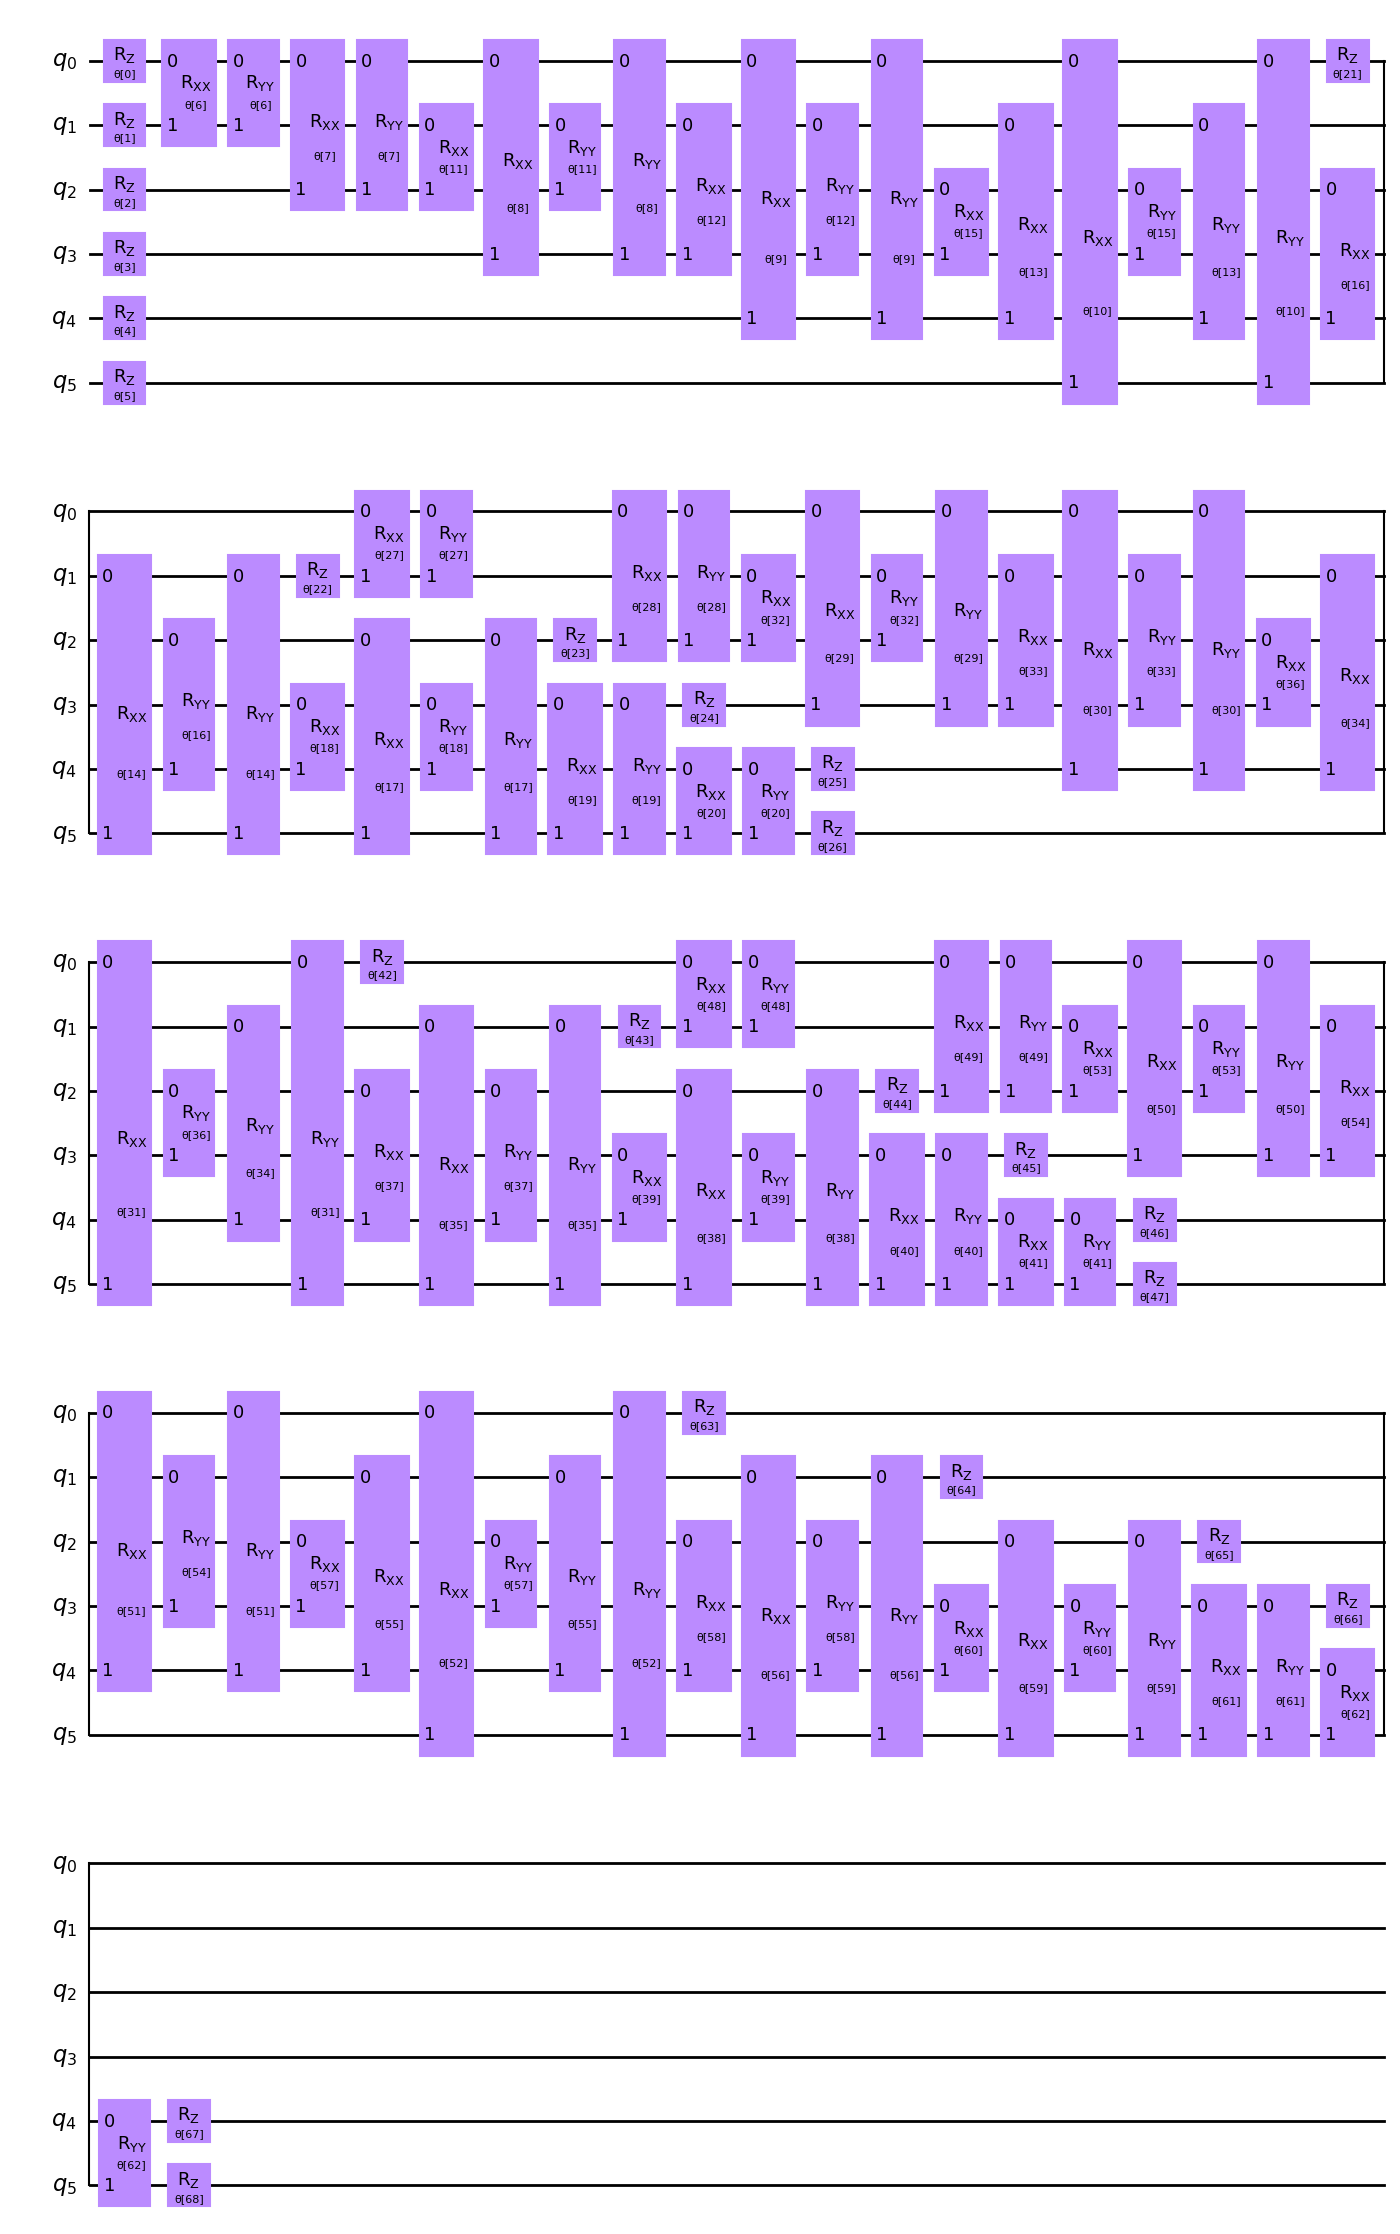

In [94]:
from qiskit.circuit.library import ExcitationPreserving
ansatz = ExcitationPreserving(num_qubits=num_features)
ansatz.decompose().draw(output="mpl", fold=20)

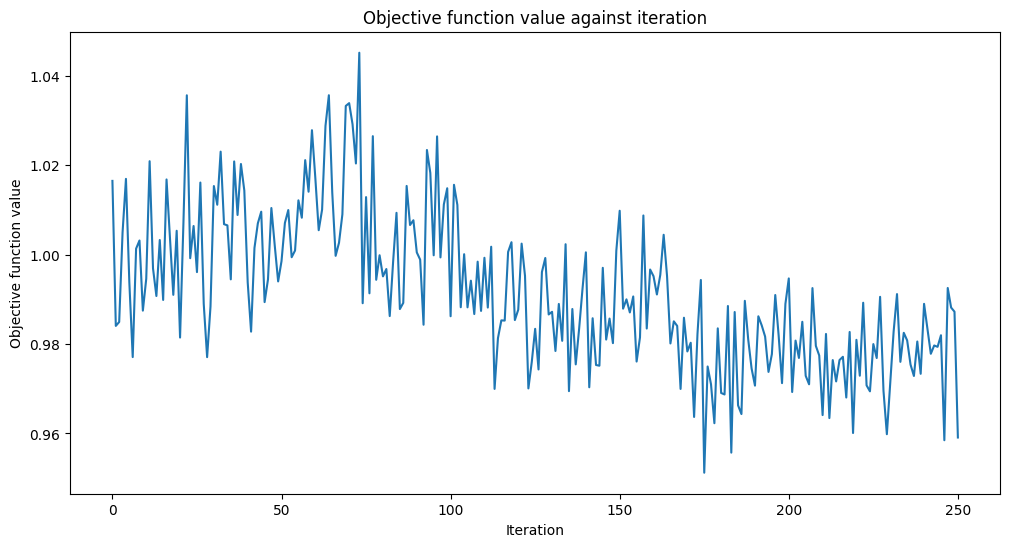

Training time: 1943 seconds


In [95]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    feature_map=feature_map,
    sampler=sampler,
    ansatz=ansatz,
    optimizer=optimizer,
    callback= callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

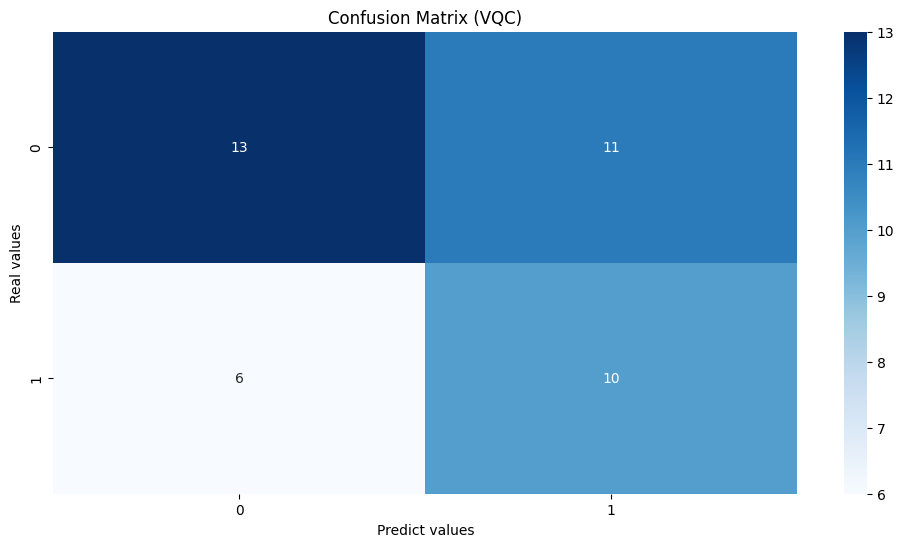

In [96]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix
q_predictions = vqc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (VQC)")
plot.show()

In [97]:
train_score_q4 = vqc.score(X_train_np, y_train_np)
test_score_q4 = vqc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.59
Quantum VQC on the test dataset:     0.57


In [98]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.684211  0.541667  0.604651        24
           1   0.476190  0.625000  0.540541        16

    accuracy                       0.575000        40
   macro avg   0.580201  0.583333  0.572596        40
weighted avg   0.601003  0.575000  0.579007        40



## Utilizando Pegasus

In [99]:
import numpy as np
X_train_np = np.array(features_train.values)
y_train_np = labels_train.values

In [100]:
import numpy as np
X_test_np = np.array(features_test.values)
y_test_np = labels_test.values

In [101]:
# number of qubits is equal to the number of features
num_qubits = len(features.columns)

# number of steps performed during the training procedure
tau = 100

# regularization parameter
C = 1000

In [102]:
from qiskit import BasicAer
from qiskit.circuit.library import ZFeatureMap
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.kernels import FidelityQuantumKernel

algorithm_globals.random_seed = 12345

feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=1)

qkernel = FidelityQuantumKernel(feature_map=feature_map)

C:\Users\estre\AppData\Local\Temp\ipykernel_23636\139360568.py:1: DeprecationWarning: BasicAer is deprecated since Qiskit 0.46 and will be removed in Qiskit 1.0. The BasicAer (qiskit.providers.basicaer) module has been superseded by  qiskit.providers.basic_provider, and all its classes have been renamed to follow a new naming convention. More information and migration guidelines can be found in the 0.46 API docs for BasicAer.
  from qiskit import BasicAer


In [103]:
from qiskit_machine_learning.algorithms import PegasosQSVC
import time
np.random.seed(123)
pegasos_qsvc = PegasosQSVC(quantum_kernel=qkernel, C=C, num_steps=tau)

# training
start = time.time()
pegasos_qsvc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

# testing
pegasos_score = pegasos_qsvc.score(X_test_np, y_test_np)
print(f"PegasosQSVC classification test score: {pegasos_score}")

Training time: 7 seconds
PegasosQSVC classification test score: 0.675


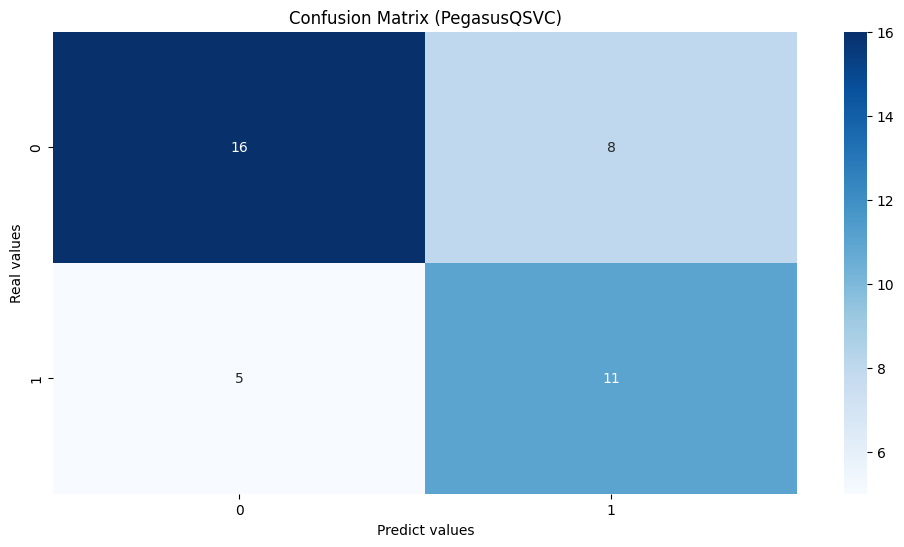

In [104]:
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.metrics import confusion_matrix
q_predictions = pegasos_qsvc.predict(X_test_np)
confusion2 = confusion_matrix(y_test_np, q_predictions)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (PegasusQSVC)")
plot.show()

In [105]:
train_score_q4 = pegasos_qsvc.score(X_train_np, y_train_np)
test_score_q4 = pegasos_qsvc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.77
Quantum VQC on the test dataset:     0.68


In [106]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, q_predictions, digits=6))

              precision    recall  f1-score   support

           0   0.761905  0.666667  0.711111        24
           1   0.578947  0.687500  0.628571        16

    accuracy                       0.675000        40
   macro avg   0.670426  0.677083  0.669841        40
weighted avg   0.688722  0.675000  0.678095        40



## QSVC

In [107]:
from qiskit_machine_learning.algorithms import QSVC
from sklearn import metrics
import time
# Use QSVC for classification
qsvc = QSVC(quantum_kernel=qkernel)

# Fit the QSVC
start = time.time()
qsvc.fit(X_train_np, y_train_np)
elapsed = time.time() - start

# Predict the labels
labels_test = qsvc.predict(X_test_np)

# Evalaute the test accuracy
accuracy_test = metrics.balanced_accuracy_score(y_true=y_test_np, y_pred=labels_test)
print(f"accuracy test: {accuracy_test}")

accuracy test: 0.7083333333333333


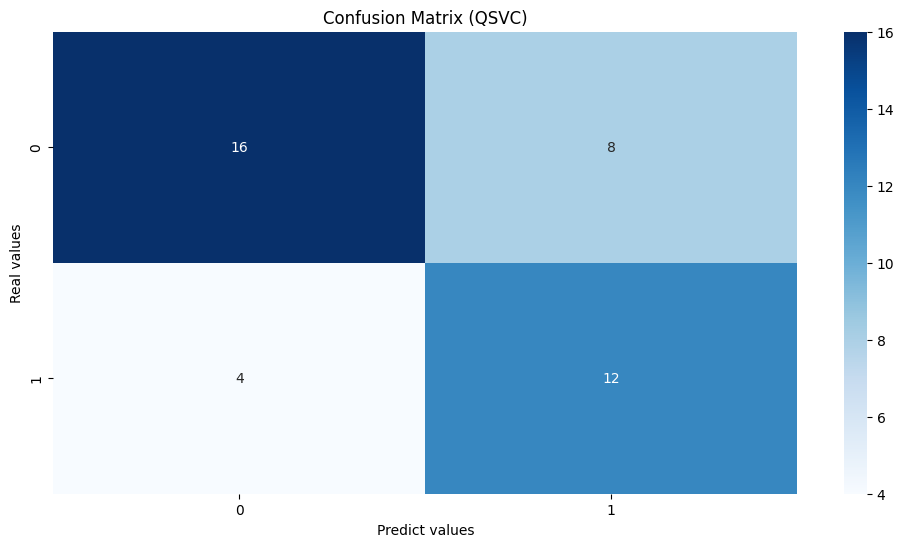

In [108]:
confusion2 = confusion_matrix(y_test_np, labels_test)
sns.heatmap(confusion2, annot = True, cmap = "Blues", fmt = "d")
plot.xlabel("Predict values")
plot.ylabel("Real values")
plot.title("Confusion Matrix (QSVC)")
plot.show()

In [109]:
train_score_q4 = qsvc.score(X_train_np, y_train_np)
test_score_q4 = qsvc.score(X_test_np, y_test_np)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.98
Quantum VQC on the test dataset:     0.70


In [110]:
from sklearn.metrics import classification_report
print(classification_report( y_test_np, labels_test, digits=6))

              precision    recall  f1-score   support

           0   0.800000  0.666667  0.727273        24
           1   0.600000  0.750000  0.666667        16

    accuracy                       0.700000        40
   macro avg   0.700000  0.708333  0.696970        40
weighted avg   0.720000  0.700000  0.703030        40

